## Data preparation

### Stock index and sectoral sub-index

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Monthly Returns Data (Sample):
            Technology  Financials  Health Care  Consumer Discretionary  \
Date                                                                      
2000-02-01    0.105067   -0.107046    -0.065386               -0.055716   
2000-03-01    0.083893    0.178301     0.089949                0.139295   
2000-04-01   -0.091847    0.013363    -0.011717               -0.018912   
2000-05-01   -0.103978    0.022321    -0.026804               -0.053980   
2000-06-01    0.099557   -0.051779     0.002119               -0.055908   

            Utilities   S&P 500  
Date                             
2000-02-01  -0.121538 -0.020108  
2000-03-01   0.101030  0.096720  
2000-04-01   0.073401 -0.030796  
2000-05-01  -0.002194 -0.021915  
2000-06-01  -0.041231  0.023934  


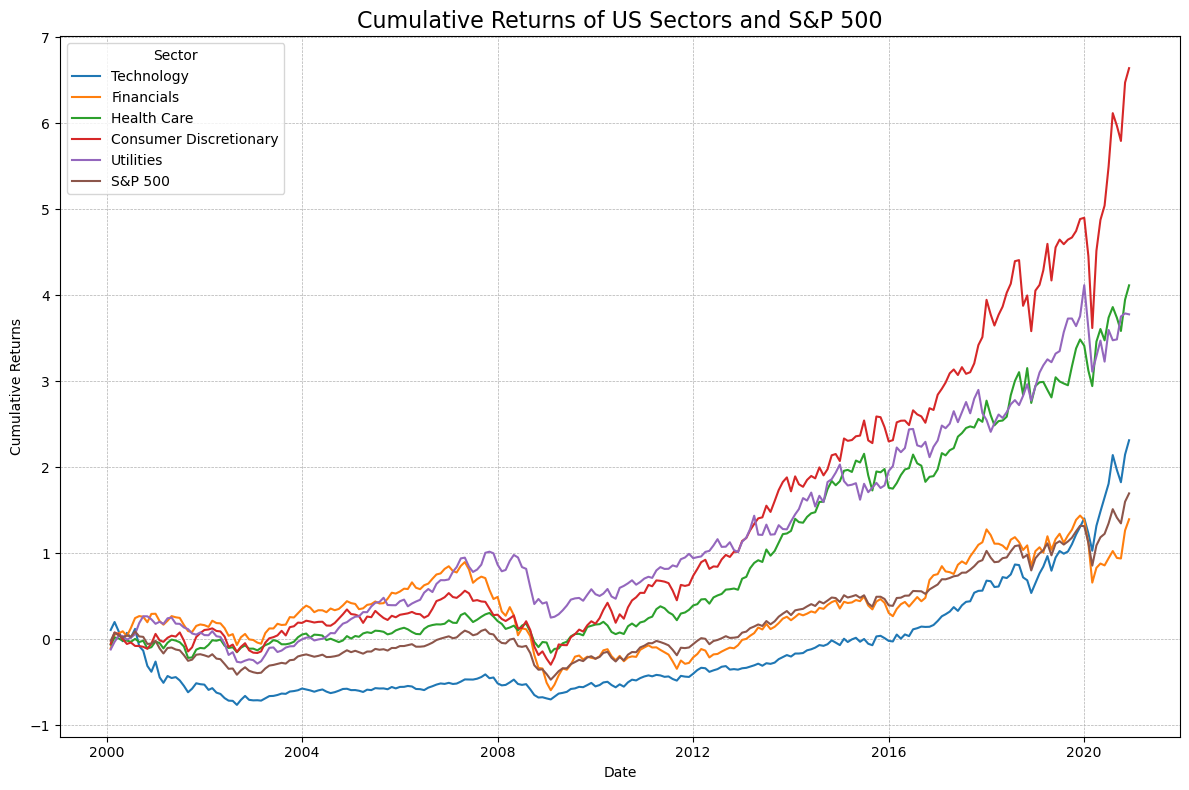

In [349]:
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd

# Define sector tickers for US only, including the S&P 500 index (SPX)
sector_tickers = {
    'Technology': 'XLK',
    'Financials': 'XLF',
    'Health Care': 'XLV',
    'Consumer Discretionary': 'XLY',
    'Utilities': 'XLU',
    'S&P 500': '^GSPC'  # Add S&P 500 index
}

# Date range for data extraction
start_date = '2000-01-01'
end_date = '2021-01-01'

# Download and calculate monthly returns for US sectors and SPX
sector_data = {}
cumulative_data = {}  # For plotting cumulative returns

for sector, ticker in sector_tickers.items():
    try:
        df = yf.download(ticker, start=start_date, end=end_date, interval='1mo')['Adj Close']
        if df.isnull().all():
            print(f"No data found for {ticker} ({sector}). Skipping this sector.")
            continue
        # Calculate monthly returns and cumulative returns
        monthly_returns = df.pct_change().dropna()
        cumulative_returns = (1 + monthly_returns).cumprod() - 1  # Convert to cumulative returns

        sector_data[sector] = monthly_returns  # Store monthly returns
        cumulative_data[sector] = cumulative_returns  # Store cumulative returns for plotting
    except Exception as e:
        print(f"Error downloading data for {ticker} ({sector}): {e}")

# Convert monthly returns and cumulative returns to DataFrames
monthly_returns_df = pd.DataFrame(sector_data)
cumulative_returns_df = pd.DataFrame(cumulative_data)

# Display monthly returns DataFrame
print("Monthly Returns Data (Sample):")
print(monthly_returns_df.head())

# Plot cumulative returns
plt.figure(figsize=(12, 8))
plt.title("Cumulative Returns of US Sectors and S&P 500", fontsize=16)

for sector in cumulative_returns_df.columns:
    plt.plot(cumulative_returns_df.index, cumulative_returns_df[sector], label=sector, linewidth=1.5)

plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.legend(title="Sector")
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()

# Show the plot
plt.show()


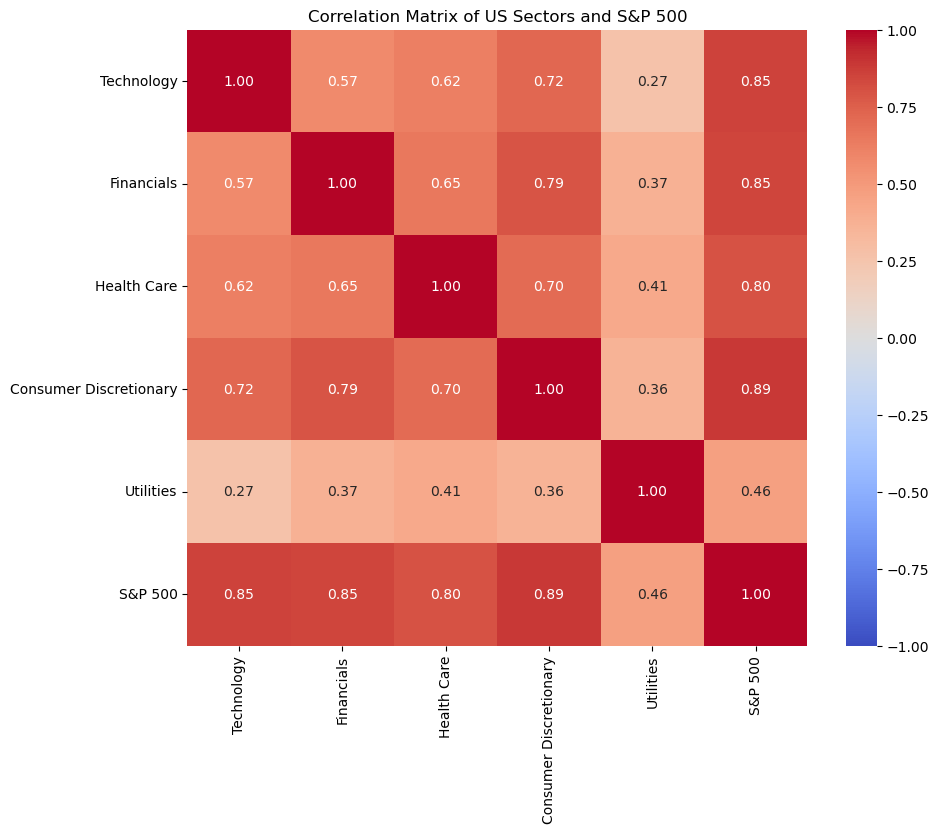

In [351]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix for monthly returns
corr_matrix = monthly_returns_df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1, fmt=".2f", cbar=True)
plt.title("Correlation Matrix of US Sectors and S&P 500")
plt.show()


### Individual stock data 

In [352]:
import pandas as pd

# Define the path to price.csv
price_path = 'C:/Users/lilia/PycharmProjects/pythonProject/FactorTiming/clean data/price.csv'

# Read the price data
price_df = pd.read_csv(price_path)

# Ensure 'Date' column is treated as a datetime object for easier handling
price_df['trade_date'] = pd.to_datetime(price_df['trade_date'])

# Remove "US Equity" from stock names
price_df['stock_name'] = price_df['stock_name'].str.replace(' US Equity', '')

# Pivot the DataFrame to have 'Date' as index and stock names as columns
price_pivot = price_df.pivot(index='trade_date', columns='stock_name', values='price')

# Rename the index to 'Date' for clarity
price_pivot.index.name = 'Date'
missing_percentage = price_pivot.isna().mean()

# Drop columns with more than 30% missing values
columns_to_drop = missing_percentage[missing_percentage > 0.3].index
price_pivot_cleaned = price_pivot.drop(columns=columns_to_drop)

# Interpolate missing values for columns with less than 30% missing
price_pivot_cleaned = price_pivot_cleaned.interpolate(method='linear', axis=0)

# Forward and backward fill to handle NaNs at the beginning or end
price_pivot_cleaned = price_pivot_cleaned.ffill().bfill()

print(price_pivot_cleaned.head())

stock_name   AAPL   ABC   ABMD     ABT   ADBE     ADI     ADM     ADP    ADSK  \
Date                                                                            
1990-01-02  0.333  0.97  5.875  3.8740  1.282  1.6042  8.5382  4.9127  5.0313   
1990-01-03  0.335  0.97  5.813  3.8880  1.345  1.5208  8.5382  4.8881  5.1563   
1990-01-04  0.336  0.97  5.625  3.8810  1.408  1.5000  8.4918  4.8634  5.0313   
1990-01-05  0.337  0.97  5.750  3.8390  1.440  1.5000  8.1205  4.8265  5.0313   
1990-01-08  0.339  0.97  5.750  3.8321  1.456  1.5000  8.2134  4.8388  4.9844   

stock_name      AEE  ...     WMB     WMT     WRB     WST       WY      XEL  \
Date                 ...                                                     
1990-01-02  42.8125  ...  4.9662  5.8906  1.6241  4.7188  11.6129  20.2500   
1990-01-03  42.8125  ...  5.0755  5.8906  1.6485  4.6875  11.3571  20.1875   
1990-01-04  42.8125  ...  4.9194  5.8594  1.6339  4.7500  11.2548  19.6875   
1990-01-05  42.8125  ...  4.9350  5.7969  

In [310]:

price_pivot_cleaned.columns.name = None  


print(price_pivot_cleaned.head())


             AAPL   ABC   ABMD     ABT   ADBE     ADI     ADM     ADP    ADSK  \
Date                                                                            
1990-01-02  0.333  0.97  5.875  3.8740  1.282  1.6042  8.5382  4.9127  5.0313   
1990-01-03  0.335  0.97  5.813  3.8880  1.345  1.5208  8.5382  4.8881  5.1563   
1990-01-04  0.336  0.97  5.625  3.8810  1.408  1.5000  8.4918  4.8634  5.0313   
1990-01-05  0.337  0.97  5.750  3.8390  1.440  1.5000  8.1205  4.8265  5.0313   
1990-01-08  0.339  0.97  5.750  3.8321  1.456  1.5000  8.2134  4.8388  4.9844   

                AEE  ...     WMB     WMT     WRB     WST       WY      XEL  \
Date                 ...                                                     
1990-01-02  42.8125  ...  4.9662  5.8906  1.6241  4.7188  11.6129  20.2500   
1990-01-03  42.8125  ...  5.0755  5.8906  1.6485  4.6875  11.3571  20.1875   
1990-01-04  42.8125  ...  4.9194  5.8594  1.6339  4.7500  11.2548  19.6875   
1990-01-05  42.8125  ...  4.9350  5.7969  

In [312]:
import pandas as pd
import numpy as np

file_path = 'C:/Users/lilia/PycharmProjects/pythonProject/FactorTiming/clean data/SPX Sector industry.csv'
sector_df = pd.read_csv(file_path)
sector_df['stock_name'] = sector_df['stock_name'].str.replace(' US Equity', '')
price_pivot_cleaned = price_pivot_cleaned.loc['2000-01-01':'2021-12-31']
price_pivot_cleaned = price_pivot_cleaned.apply(lambda x: x.mask(x == 0, x.median()), axis=0)
monthly_prices = price_pivot_cleaned.resample('M').last()

industry_monthly_returns_dict = {}
for industry in sector_df['GICS Sector'].unique():
    industry_stocks = set(sector_df[sector_df['GICS Sector'] == industry]['stock_name'])
    matching_stocks = industry_stocks.intersection(monthly_prices.columns)
    industry_data = monthly_prices[list(matching_stocks)]
    industry_monthly_returns = industry_data.pct_change().dropna()  
    industry_monthly_returns.index = pd.to_datetime(industry_monthly_returns.index.strftime('%Y-%m-01'))
    industry_monthly_returns.replace([np.inf, -np.inf], np.nan, inplace=True)
    industry_monthly_returns.fillna(industry_monthly_returns.median(), inplace=True)
    industry_monthly_returns_dict[industry] = industry_monthly_returns
print("Example of processed monthly returns for 'Information Technology':")
print(industry_monthly_returns_dict.get('Information Technology', "Industry not found").head())

Example of processed monthly returns for 'Information Technology':
                JKHY       PTC        IT       TER       APH      ADSK  \
Date                                                                     
2000-02-01  0.220528  0.413994 -0.080319  0.343629  0.177691  0.462176   
2000-03-01  0.055453 -0.305154  0.100398 -0.057471  0.279143  0.018180   
2000-04-01  0.071186 -0.612760 -0.142857  0.341463  0.246956 -0.156589   
2000-05-01  0.100871  0.302684 -0.013852 -0.218182 -0.282351 -0.030947   
2000-06-01  0.152712  0.035294 -0.098625 -0.145349  0.444499 -0.067227   

                NTAP      MSFT      TRMB       ADP  ...       WDC      SNPS  \
Date                                                ...                       
2000-02-01  0.880448 -0.086845  0.263145 -0.081687  ... -0.052632 -0.135318   
2000-03-01 -0.123179  0.188811  0.072925  0.107606  ...  0.652778  0.220654   
2000-04-01 -0.106495 -0.343529  0.072815  0.115284  ... -0.075630 -0.138462   
2000-05-01 -0.12679

In [341]:
import pandas as pd
import numpy as np

# Define the file path for sector data
file_path = 'C:/Users/lilia/PycharmProjects/pythonProject/FactorTiming/clean data/SPX Sector industry.csv'

# Load sector data and remove 'US Equity' suffix from stock names
sector_df = pd.read_csv(file_path)
sector_df['stock_name'] = sector_df['stock_name'].str.replace(' US Equity', '')

# Define the price pivot DataFrame, filtering the date range and replacing zero values
price_pivot_cleaned = price_pivot_cleaned.loc['2000-01-01':'2021-12-31']
price_pivot_cleaned = price_pivot_cleaned.apply(lambda x: x.mask(x == 0, x.median()), axis=0)

# Resample to the last price of each month
monthly_prices = price_pivot_cleaned.resample('M').last()
industry_monthly_returns_dict = {}

# Calculate monthly returns for each industry
for industry in sector_df['GICS Sector'].unique():
    industry_stocks = set(sector_df[sector_df['GICS Sector'] == industry]['stock_name'])
    matching_stocks = industry_stocks.intersection(monthly_prices.columns)
    industry_data = monthly_prices[list(matching_stocks)]
    
    # Calculate monthly returns and process missing or extreme values
    industry_monthly_returns = industry_data.pct_change().dropna()  # Calculate monthly percentage change
    industry_monthly_returns.index = pd.to_datetime(industry_monthly_returns.index.strftime('%Y-%m-01'))  # Set day to "01" for consistency
    industry_monthly_returns.replace([np.inf, -np.inf], np.nan, inplace=True)
    industry_monthly_returns.fillna(industry_monthly_returns.median(), inplace=True)
    
    # Store the processed DataFrame in the dictionary
    industry_monthly_returns_dict[industry] = industry_monthly_returns

# Example output for "Information Technology" industry
print("Example of processed monthly returns for 'Information Technology':")
print(industry_monthly_returns_dict.get('Information Technology', "Industry not found").head())


Example of processed monthly returns for 'Information Technology':
                JKHY       PTC        IT       TER       APH      ADSK  \
Date                                                                     
2000-02-01  0.220528  0.413994 -0.080319  0.343629  0.177691  0.462176   
2000-03-01  0.055453 -0.305154  0.100398 -0.057471  0.279143  0.018180   
2000-04-01  0.071186 -0.612760 -0.142857  0.341463  0.246956 -0.156589   
2000-05-01  0.100871  0.302684 -0.013852 -0.218182 -0.282351 -0.030947   
2000-06-01  0.152712  0.035294 -0.098625 -0.145349  0.444499 -0.067227   

                NTAP      MSFT      TRMB       ADP  ...       WDC      SNPS  \
Date                                                ...                       
2000-02-01  0.880448 -0.086845  0.263145 -0.081687  ... -0.052632 -0.135318   
2000-03-01 -0.123179  0.188811  0.072925  0.107606  ...  0.652778  0.220654   
2000-04-01 -0.106495 -0.343529  0.072815  0.115284  ... -0.075630 -0.138462   
2000-05-01 -0.12679

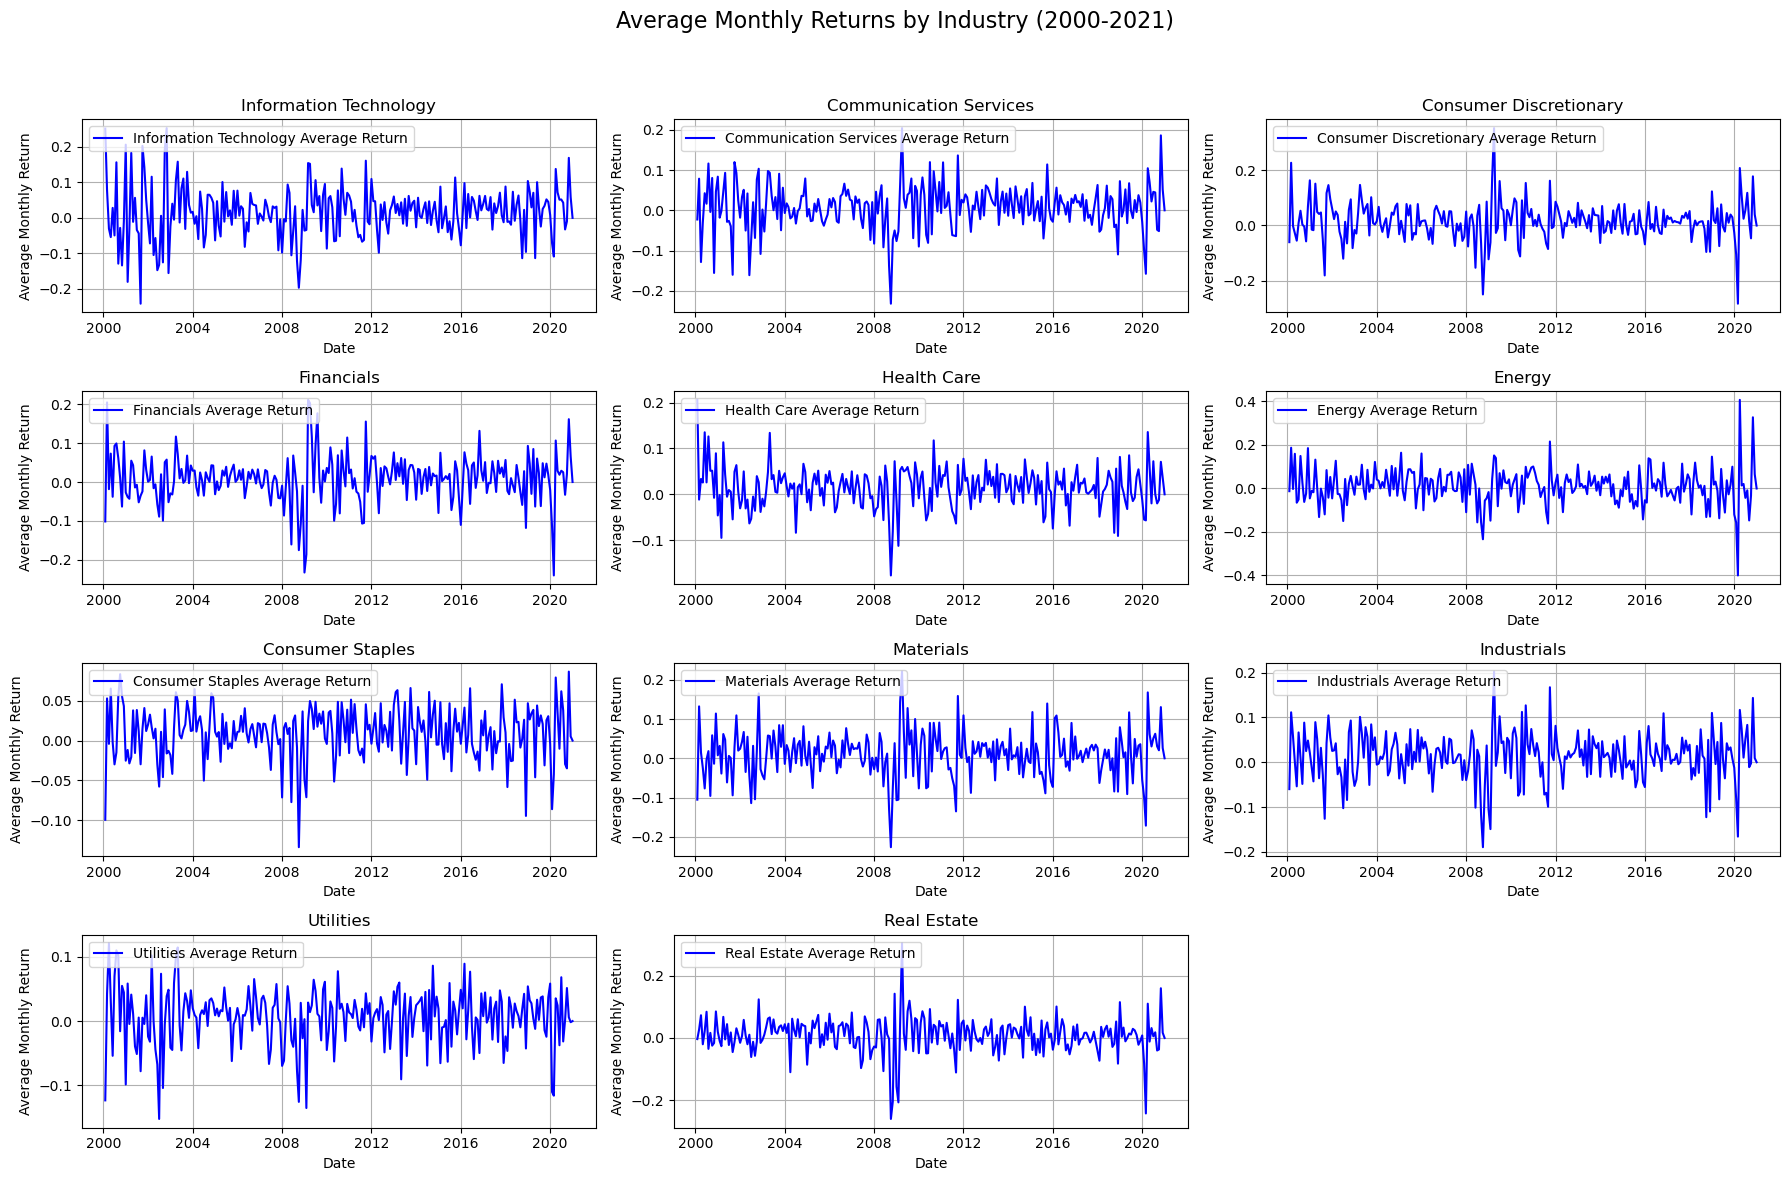

In [346]:
import matplotlib.pyplot as plt

# Set up a 4x3 grid for subplots
fig, axes = plt.subplots(4, 3, figsize=(18, 12), dpi=100)
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Plot average monthly returns for each industry
for i, (industry, returns_df) in enumerate(industry_monthly_returns_dict.items()):
    ax = axes[i]
    
    # Calculate the average monthly return for the industry
    industry_avg_return = returns_df.mean(axis=1)
    
    # Plot the average return
    ax.plot(industry_avg_return.index, industry_avg_return, label=f"{industry} Average Return", color='blue')
    ax.set_title(industry)
    ax.set_xlabel("Date")
    ax.set_ylabel("Average Monthly Return")
    ax.grid(True)
    ax.legend(loc='upper left')

# Turn off any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Add a main title and adjust layout
fig.suptitle("Average Monthly Returns by Industry (2000-2021)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


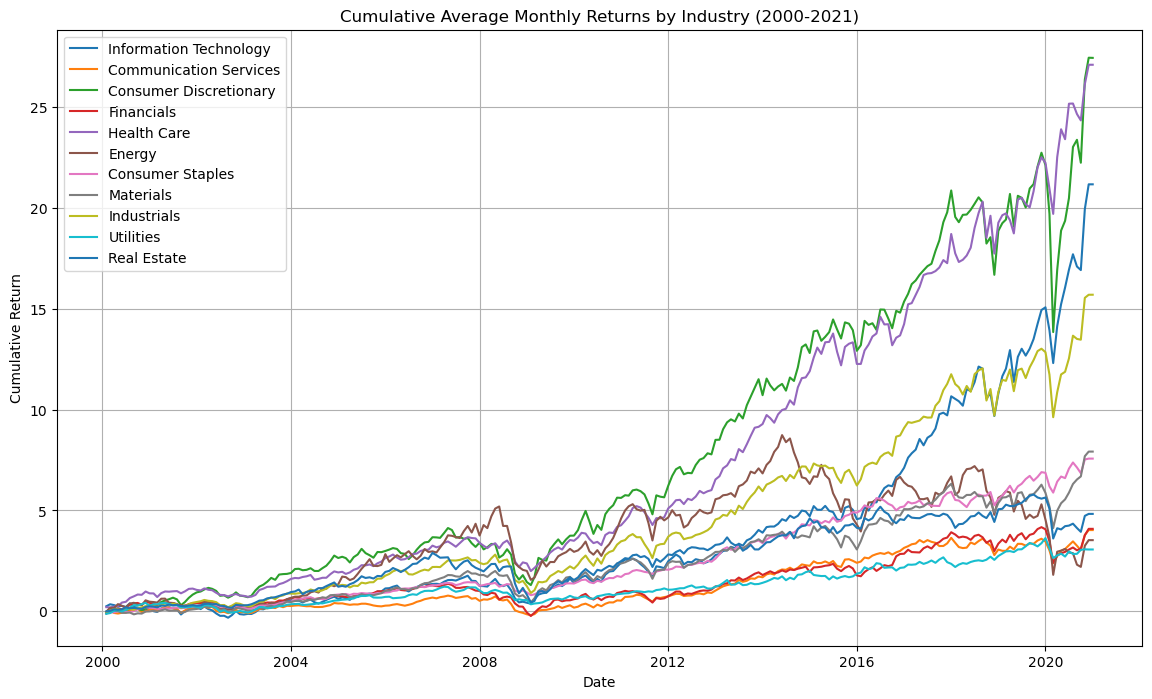

In [347]:
import matplotlib.pyplot as plt

# Initialize a DataFrame to store cumulative returns for each industry
cumulative_returns = pd.DataFrame()

# Calculate cumulative returns for each industry's average monthly return
for industry, returns_df in industry_monthly_returns_dict.items():
    # Calculate the average monthly return for the industry
    industry_avg_return = returns_df.mean(axis=1)
    
    # Calculate cumulative returns
    cumulative_industry_return = (1 + industry_avg_return).cumprod() - 1
    
    # Add cumulative returns to the DataFrame
    cumulative_returns[industry] = cumulative_industry_return

# Plot all industries' cumulative returns on a single plot
plt.figure(figsize=(14, 8), dpi=100)
for industry in cumulative_returns.columns:
    plt.plot(cumulative_returns.index, cumulative_returns[industry], label=industry)

# Add labels, title, and legend
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.title("Cumulative Average Monthly Returns by Industry (2000-2021)")
plt.legend(loc="upper left")
plt.grid(True)
plt.show()


In [533]:
# Initialize a DataFrame to store average monthly returns for each industry
industry_avg_returns_df = pd.DataFrame()

# Calculate average monthly returns for each industry
for industry, returns_df in industry_monthly_returns_dict.items():
    # Calculate the average monthly return for the industry and keep it as a DataFrame
    industry_avg_return = returns_df.mean(axis=1).to_frame(name=industry)
    
    # Add average monthly returns to the DataFrame
    industry_avg_returns_df = pd.concat([industry_avg_returns_df, industry_avg_return], axis=1)

# Display the average monthly returns DataFrame
industry_avg_returns_df


,Information Technology,Communication Services,Consumer Discretionary,Financials,Health Care,Energy,Consumer Staples,Materials,Industrials,Utilities,Real Estate
Date,,,,,,,,,,,
2000-02-01,0.251234,-0.022849,-0.060435,-0.101499,0.206115,-0.012389,-0.099316,-0.105444,-0.059907,-0.123654,-0.003585
2000-03-01,0.077799,0.078613,0.226841,0.204875,-0.011544,0.187372,0.052879,0.132307,0.111294,0.042412,0.027067
2000-04-01,-0.030320,-0.128638,-0.002227,-0.018434,0.033497,-0.002333,-0.004132,0.014838,0.057228,0.121183,0.073314
2000-05-01,-0.053992,-0.030474,-0.028201,0.073067,0.025689,0.159459,0.065191,-0.024299,0.000314,0.031646,-0.020271
2000-06-01,0.028100,0.042472,-0.055098,-0.037996,0.135319,-0.065359,-0.002148,-0.076836,-0.053670,-0.054160,0.022530
...,...,...,...,...,...,...,...,...,...,...,...
2020-09-01,-0.032488,-0.048484,0.014809,-0.032860,-0.019873,-0.146966,-0.029499,0.030388,-0.010944,0.001547,-0.040309
2020-10-01,-0.009741,-0.051739,-0.046602,0.020557,-0.012336,-0.032516,-0.034859,0.020391,-0.002588,0.051545,-0.036918
2020-11-01,0.168836,0.186306,0.177660,0.161644,0.070922,0.327283,0.086479,0.130466,0.143358,0.005938,0.160378


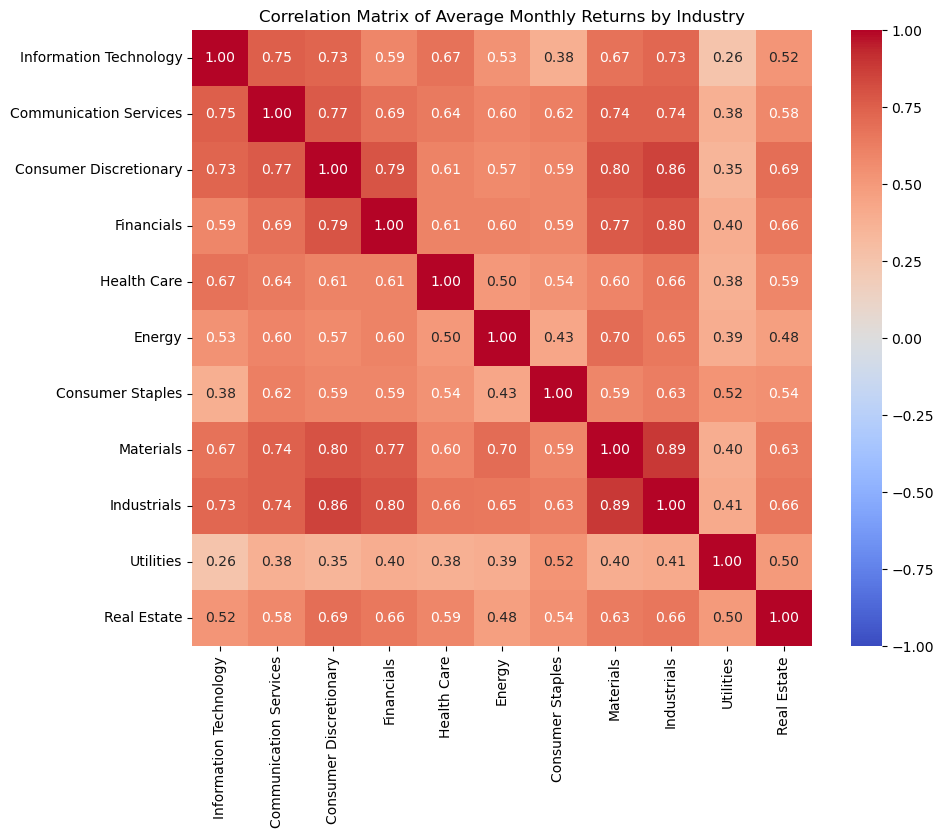

In [348]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate average monthly returns for each industry and store in a DataFrame
industry_avg_returns = pd.DataFrame({
    industry: returns_df.mean(axis=1)
    for industry, returns_df in industry_monthly_returns_dict.items()
})

# Calculate the correlation matrix
corr_matrix = industry_avg_returns.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1, fmt=".2f", cbar=True)
plt.title("Correlation Matrix of Average Monthly Returns by Industry")
plt.show()


### Factor data

In [319]:
import os
import pandas as pd
import numpy as np

# Define the path to the data directory and the specific US file
data_path = r'C:\Users\lilia\data2'
us_file = 'US theme factor.csv'

def process_inf_zero_nan_values(df, threshold=0.50):
    """
    Function to drop columns with more than a specified threshold of inf, zero, or NaN values.
    Columns with less than the threshold will be forward/backward filled.
    
    :param df: The DataFrame to process.
    :param threshold: The maximum proportion of inf/zero/NaN values to allow before dropping the column.
    :return: A cleaned DataFrame.
    """
    inf_zero_nan_mask = (df == 0) | np.isinf(df) | df.isna()
    inf_zero_nan_proportion = inf_zero_nan_mask.mean()
    cols_to_drop = inf_zero_nan_proportion[inf_zero_nan_proportion > threshold].index
    df_cleaned = df.drop(columns=cols_to_drop)
    cols_to_fill = inf_zero_nan_proportion[inf_zero_nan_proportion <= threshold].index
    df_cleaned[cols_to_fill] = df_cleaned[cols_to_fill].replace(0, np.nan)
    df_cleaned[cols_to_fill] = df_cleaned[cols_to_fill].replace([np.inf, -np.inf], np.nan)
    df_cleaned[cols_to_fill] = df_cleaned[cols_to_fill].fillna(method='ffill').fillna(method='bfill')
    return df_cleaned

def calculate_cumulative_returns(df):
    """
    Calculate cumulative returns from individual returns in the DataFrame.
    
    :param df: The DataFrame with individual returns.
    :return: DataFrame with cumulative returns.
    """
    return (1 + df).cumprod() - 1

# Load and process the US data
us_file_path = os.path.join(data_path, us_file)
us_df = pd.read_csv(us_file_path)

# Extract relevant columns: Date, Factor name, and Return
us_df = us_df[['date', 'name', 'ret']].copy()
us_df.rename(columns={'date': 'Date', 'name': 'Factor', 'ret': 'Return'}, inplace=True)
us_df = us_df[us_df['Date'] != '########']

# Convert Date column to datetime format, set day to "01", and filter the date range
us_df['Date'] = pd.to_datetime(us_df['Date'], errors='coerce')
us_df.dropna(subset=['Date'], inplace=True)
us_df['Date'] = us_df['Date'].dt.strftime('%Y-%m-01')  # Set day to "01" for each month
us_df['Date'] = pd.to_datetime(us_df['Date'])  # Ensure the Date column is in datetime format

# Filter the DataFrame to include only dates from January 2000 to January 2021
us_df = us_df[(us_df['Date'] >= '2000-01-01') & (us_df['Date'] <= '2021-01-01')]

# Pivot the DataFrame to have Factor names as columns and Return values as data
us_pivoted = us_df.pivot(index='Date', columns='Factor', values='Return')

# Process inf, zero, and NaN values
us_cleaned = process_inf_zero_nan_values(us_pivoted)

# Calculate cumulative returns
us_cumulative = calculate_cumulative_returns(us_cleaned)

# Display the processed US DataFrame
print("Processed and cleaned cumulative returns DataFrame for US (from 2000-01 to 2021-01):")
print(us_cumulative.head())


Processed and cleaned cumulative returns DataFrame for US (from 2000-01 to 2021-01):
Factor      accruals  debt_issuance  investment  low_leverage  low_risk  \
Date                                                                      
2000-01-01  0.001818       0.013214    0.001535      0.058574 -0.025444   
2000-02-01 -0.002014       0.080454   -0.101738      0.361897 -0.285368   
2000-03-01 -0.017468       0.051976   -0.059862      0.127136 -0.177436   
2000-04-01 -0.032664       0.054438    0.007064     -0.021665 -0.058104   
2000-05-01 -0.035275       0.047010    0.083390     -0.122695  0.060063   

Factor      momentum  profit_growth  profitability   quality  seasonality  \
Date                                                                        
2000-01-01  0.028360      -0.000387      -0.060950 -0.031586     0.001378   
2000-02-01  0.266686       0.019323      -0.199653 -0.011215     0.007748   
2000-03-01  0.098676       0.014238      -0.068425  0.028004     0.019130   
2000

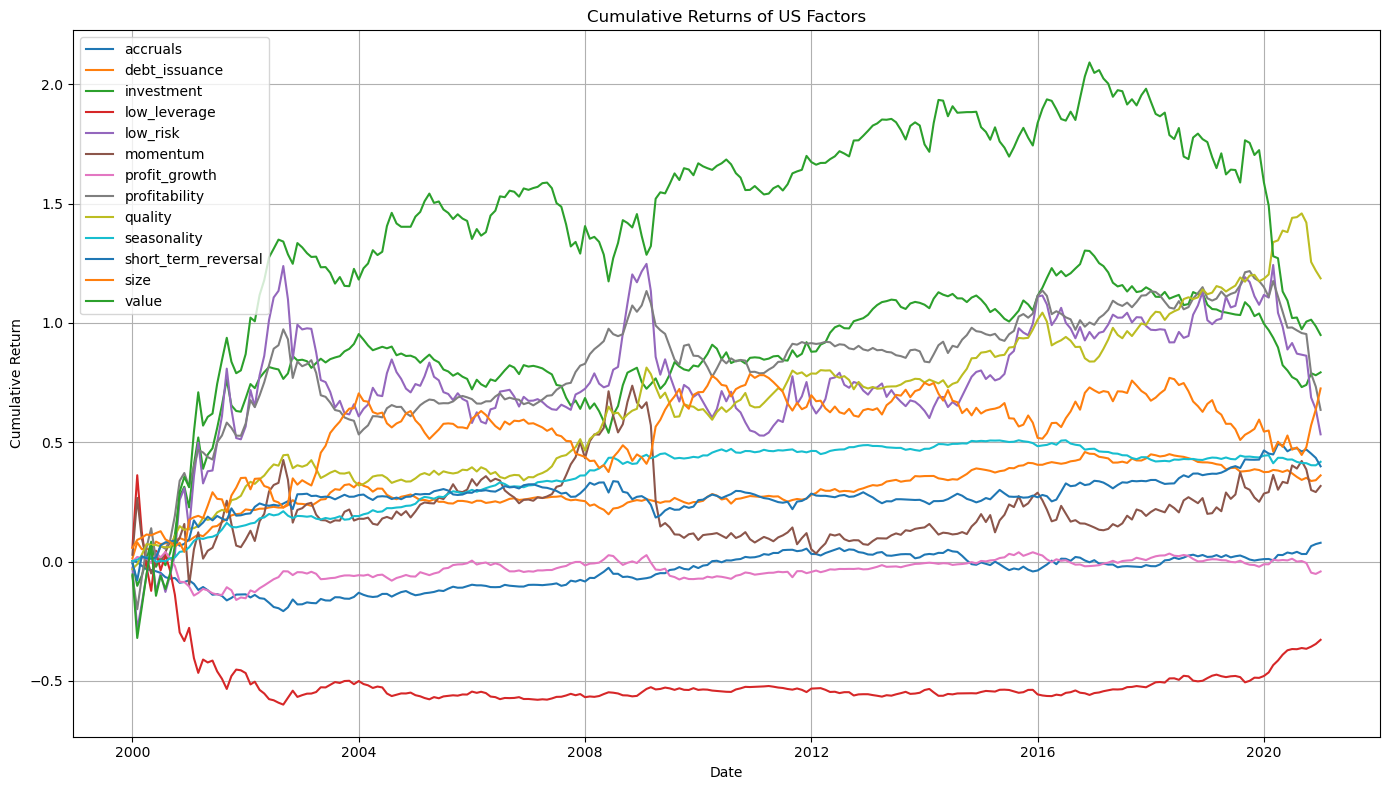

In [362]:
    import matplotlib.pyplot as plt

    # Plot cumulative returns for each factor in the US DataFrame
    plt.figure(figsize=(14, 8))
    for column in us_cumulative.columns:
        plt.plot(us_cumulative.index, us_cumulative[column], label=column)

    # Adding labels and title
    plt.xlabel('Date')
    plt.ylabel('Cumulative Return')
    plt.title('Cumulative Returns of US Factors')
    plt.legend(loc='best')
    plt.grid(True)
    plt.tight_layout()

    # Show plot
    plt.show()


In [535]:
us_cleaned.keys()

Index(['accruals', 'debt_issuance', 'investment', 'low_leverage', 'low_risk',
       'momentum', 'profit_growth', 'profitability', 'quality', 'seasonality',
       'short_term_reversal', 'size', 'value'],
      dtype='object', name='Factor')

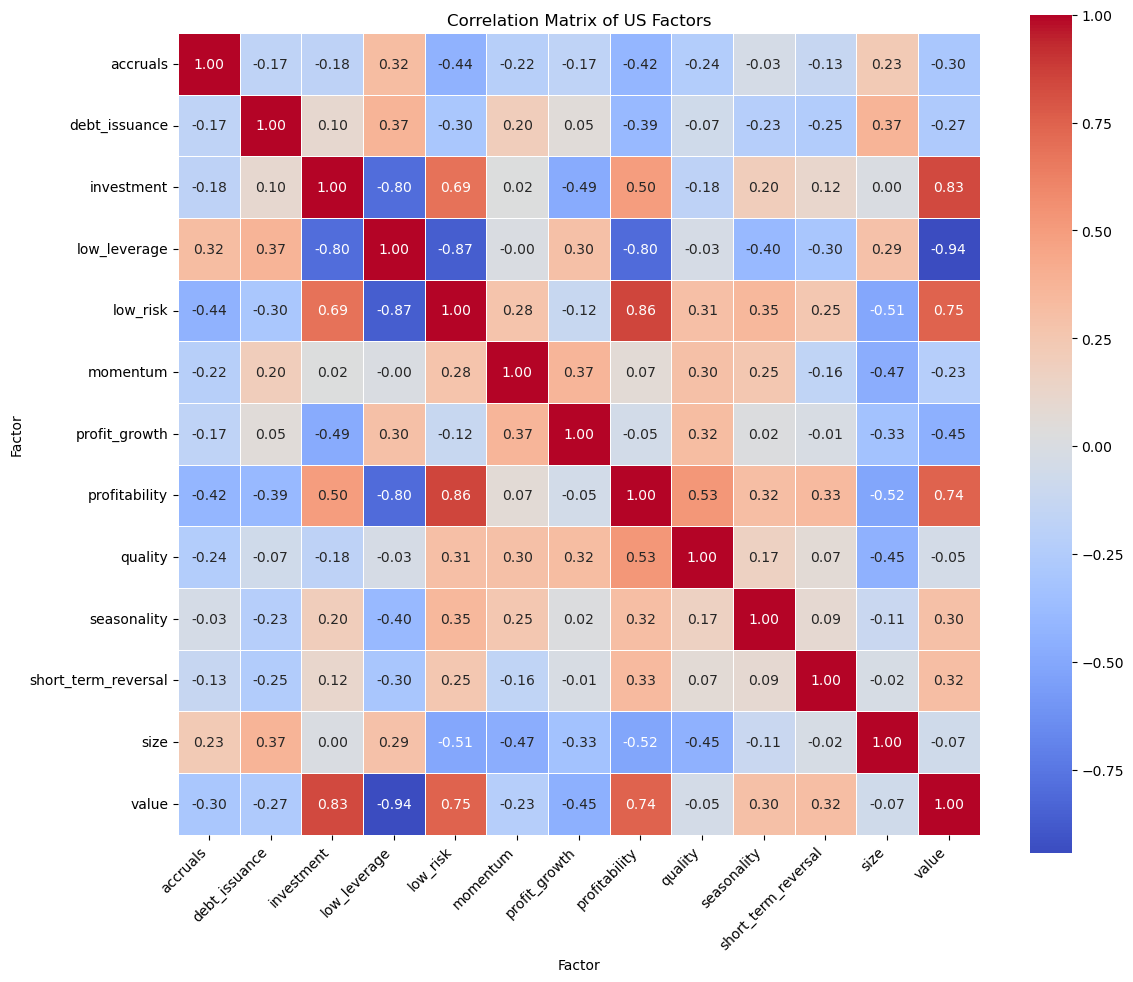

In [363]:
correlation_matrix = us_cleaned.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Generate a heatmap with annotations
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", 
            cbar=True, square=True, linewidths=0.5, annot_kws={"size": 10})

# Customize the plot
plt.title("Correlation Matrix of US Factors")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.yticks(rotation=0)  # Set y-axis labels to horizontal
plt.tight_layout()  # Adjust layout for better fit

# Show the plot
plt.show()

In [ ]:
import os
import pandas as pd

# Define the directory where to save the LaTeX files
output_directory = r"C:\Users\lilia\Downloads"
os.makedirs(output_directory, exist_ok=True)

def clean_var_name(name):
    name_map = {
        'US_ted_spread': 'TED',
        'US_term_spread': 'Term',
        'US_CPI': 'CPI',
        'US_PPI': 'PPI',
        'US_personal_saving_rate': 'PSR',
        'Equity Market-related Economic Uncertainty Index': 'EMU',
        'Michigan Consumer Sentiment': 'MCS'
    }
    return name_map.get(name, name)

def format_value(x):
    if isinstance(x, (int, float)):
        if pd.isna(x):
            return '--'
        elif abs(x) < 0.01:
            return f"${x:.4f}$"
        else:
            return f"${x:.3f}$"
    elif isinstance(x, str):
        return x.replace('_', '\\_')
    return str(x)

is_first_table = True

# Generate LaTeX tables and save each as a .tex file
for df_name, results_df in stationarity_results_for_dataframes.items():
    latex_code = [
        "\\begin{table}[h]",
        "\\centering",
        "\\small",
        "\\begin{threeparttable}"
    ]
    
    if is_first_table:
        latex_code.extend([
            "\\textbf{Note on Table Interpretation:}\\\\",
            "\\vspace{0.1cm}",
            "\\begin{minipage}{0.95\\textwidth}",
            "\\small",
            "This table presents stationarity and trend test results for each variable. ",
            "The analysis includes both stochastic (S) and deterministic (D) trend tests:",
            "\\begin{itemize}",
            "\\item \\textbf{S-beta, S-p value:} Stochastic trend test coefficients and p-values",
            "\\item \\textbf{D-beta, D-p value:} Deterministic trend test coefficients and p-values",
            "\\end{itemize}",
            "A low p-value (< 0.05) indicates rejection of the null hypothesis of non-stationarity.",
            "\\end{minipage}",
            "\\vspace{0.3cm}\n"
        ])
    
    latex_code.extend([
        f"\\caption{{Stationarity Test Results for {df_name}}}",
        f"\\label{{tab:stationarity_{df_name.lower().replace(' ', '_')}}}",
        "\\begin{tabular}{lcccc}",
        "\\toprule",
        "Variable & S-$\\beta$ & S-p value & D-$\\beta$ & D-p value \\\\",
        "\\midrule"
    ])
    
    # Add table content
    for idx, row in results_df.iterrows():
        formatted_row = [
            format_value(row['Variable']),
            format_value(row['S-beta']),
            format_value(row['S-p value']),
            format_value(row['D-beta']),
            format_value(row['D-p value'])
        ]
        latex_code.append(" & ".join(formatted_row) + " \\\\")
    
    latex_code.extend([
        "\\bottomrule",
        "\\end{tabular}",
        "\\begin{tablenotes}",
        "\\small",
        "\\item \\textit{Notes:} This table reports the results of stationarity tests. ",
        "S-$\\beta$ and S-p value represent the stochastic trend test results, while ",
        "D-$\\beta$ and D-p value represent the deterministic trend test results. ",
        "P-values less than 0.05 indicate rejection of the non-stationarity null hypothesis.",
        "\\end{tablenotes}",
        "\\end{threeparttable}",
        "\\end{table}"
    ])
    
    final_latex = '\n'.join(latex_code)
    
    file_path = os.path.join(output_directory, f"stationarity_{df_name.lower()}_results.tex")
    
    with open(file_path, "w", encoding='utf-8') as f:
        f.write(final_latex)
    print(f"LaTeX table for {df_name} stationarity results saved to {file_path}")
    
    is_first_table = False

LaTeX table for macros_df stationarity results saved to C:\Users\lilia\Downloads\stationarity_macros_df_results.tex
LaTeX table for combined_data stationarity results saved to C:\Users\lilia\Downloads\stationarity_combined_data_results.tex


In [389]:
us_cleaned.keys()

Index(['accruals', 'debt_issuance', 'investment', 'low_leverage', 'low_risk',
       'momentum', 'profit_growth', 'profitability', 'quality', 'seasonality',
       'short_term_reversal', 'size', 'value'],
      dtype='object', name='Factor')

In [428]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import yfinance as yf
import statsmodels.api as sm

# Define the ticker for the 1-month US Treasury rate (risk-free rate)
risk_free_ticker = "^IRX"

# Download the risk-free rate from Yahoo Finance
start_date = '2000-01-01'
end_date = '2021-01-01'
risk_free_data = yf.download(risk_free_ticker, start=start_date, end=end_date, interval='1mo')['Adj Close']

# Convert the risk-free rate from percentage to decimal for computation
risk_free_rate_monthly = (risk_free_data * 0.01) / 12
risk_free_rate_monthly = risk_free_rate_monthly.loc['2000-01-01':'2021-01-01']

# Forward-fill the `monthly_returns_df` to cover the range from 2000-01-01 to 2021-01-01
monthly_returns_df = monthly_returns_df.reindex(pd.date_range(start='2000-01-01', end='2021-01-01', freq='MS')).ffill()

# Select the relevant date range from `us_cleaned` for the full factor set
us_factors_df = us_cleaned.loc['2000-01-01':'2021-01-01']

# Change the day to "01" for each date and convert it back to datetime
us_factors_df.index = us_factors_df.index.strftime('%Y-%m-01')
us_factors_df.index = pd.to_datetime(us_factors_df.index)

# Combine all data into a single DataFrame
combined_data = pd.DataFrame({
    'Risk-Free Rate': risk_free_rate_monthly
}).join([monthly_returns_df, us_factors_df], how='outer')  # Merge monthly returns and full factor set

# Forward-fill any remaining missing values in the combined DataFrame
combined_data = combined_data.ffill().bfill()

# Drop the first row if it has missing values due to the start of the range
combined_data = combined_data.dropna().drop(combined_data.index[0])

# Display the combined DataFrame to verify alignment and date format
print("Combined Data (Risk-Free Rate, SPX Monthly Returns, Full Factor Set, All Monthly Returns):")
print(combined_data.head(), combined_data.tail())



[*********************100%***********************]  1 of 1 completed

Combined Data (Risk-Free Rate, SPX Monthly Returns, Full Factor Set, All Monthly Returns):
            Risk-Free Rate  Technology  Financials  Health Care  \
2000-02-01        0.004700    0.105067   -0.107046    -0.065386   
2000-03-01        0.004767    0.083893    0.178301     0.089949   
2000-04-01        0.004708   -0.091847    0.013363    -0.011717   
2000-05-01        0.004575   -0.103978    0.022321    -0.026804   
2000-06-01        0.004750    0.099557   -0.051779     0.002119   

            Consumer Discretionary  Utilities   S&P 500  accruals  \
2000-02-01               -0.055716  -0.121538 -0.020108 -0.003826   
2000-03-01                0.139295   0.101030  0.096720 -0.015485   
2000-04-01               -0.018912   0.073401 -0.030796 -0.015466   
2000-05-01               -0.053980  -0.002194 -0.021915 -0.002698   
2000-06-01               -0.055908  -0.041231  0.023934 -0.005601   

            debt_issuance  investment  low_leverage  low_risk  momentum  \
2000-02-01      

## Macro Data

In [505]:
import os
import pandas as pd

# Define the path to the data directory
data_dir = r'C:\Users\lilia\PycharmProjects\pythonProject\project_v3\data\data2'

# Define the filenames for the three files
filenames = {
    "US_CPI": "US CPI.csv",
    "US_personal_saving_rate": "US personal saving rate.csv",
    "US_PPI": "US PPI.csv",
    "Michigan Consumer Sentiment": "University of Michigan Consumer Sentiment.csv"
}

# Initialize an empty DataFrame for merging
merged_df = None

# Read each file and merge into a single DataFrame
for name, file in filenames.items():
    file_path = os.path.join(data_dir, file)
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        
        # Rename the second column to match the indicator name
        df = df.rename(columns={df.columns[1]: name})
        
        # Merge with the merged DataFrame
        if merged_df is None:
            merged_df = df  # Initialize with the first DataFrame
        else:
            merged_df = pd.merge(merged_df, df, on="observation_date", how="outer")
    else:
        print(f"File {file} not found in {data_dir}")

# Rename 'observation_date' to 'Date' and set it as the index
merged_df = merged_df.rename(columns={'observation_date': 'Date'})
merged_df.set_index('Date', inplace=True)

# Display the merged DataFrame
print("\nMerged DataFrame:")
print(merged_df.head())



Merged DataFrame:
            US_CPI  US_personal_saving_rate  US_PPI  \
Date                                                  
2000-01-01   179.3                      5.0   146.8   
2000-02-01   179.4                      4.5   147.3   
2000-03-01   180.0                      4.3   147.4   
2000-04-01   180.3                      4.8   147.4   
2000-05-01   180.7                      4.8   147.8   

            Michigan Consumer Sentiment  
Date                                     
2000-01-01                        112.0  
2000-02-01                        111.3  
2000-03-01                        107.1  
2000-04-01                        109.2  
2000-05-01                        110.7  


In [508]:
import os
import pandas as pd

# Define the path to the data directory
data_dir = r'C:\Users\lilia\PycharmProjects\pythonProject\project_v3\data\data2'
files_to_process = {
    "US_ted_spread": "US ted spread.csv",
    "US_term_spread": "US term spread.csv",
    "Equity Market-related Economic Uncertainty Index":"Equity Market-related Economic Uncertainty Index.csv"
}

# Initialize an empty dictionary to store processed DataFrames
processed_dfs = {}

# Process each file
for column_name, file_name in files_to_process.items():
    file_path = os.path.join(data_dir, file_name)
    if os.path.exists(file_path):
        # Load the file
        df = pd.read_csv(file_path)
        
        # Convert 'observation_date' to datetime and set day to '01' for all dates
        df['Date'] = pd.to_datetime(df['observation_date'], dayfirst=True)  # Adjust for any day-first format
        df = df.rename(columns={df.columns[1]: column_name})  # Rename data column to appropriate name
        df = df[['Date', column_name]].set_index('Date')  # Set 'Date' as index
        
        # Resample the data to monthly frequency, taking the mean for each month
        df = df.resample('MS').mean()  # 'MS' means month start
        
        # Store the processed DataFrame in the dictionary
        processed_dfs[column_name] = df
        
        # Display the modified DataFrame for verification
        print(f"\nModified DataFrame for {column_name} (Monthly Frequency):")
        print(df.head())
    else:
        print(f"File {file_name} not found in {data_dir}")

# Combine both DataFrames into a single DataFrame
combined_df = pd.concat(processed_dfs.values(), axis=1)

# Display the combined DataFrame
print("\nCombined DataFrame (Monthly Frequency):")
print(combined_df.head())





Modified DataFrame for US_ted_spread (Monthly Frequency):
            US_ted_spread
Date                     
2000-01-01       0.683000
2000-02-01       0.525238
2000-03-01       0.502174
2000-04-01       0.585000
2000-05-01       0.875652

Modified DataFrame for US_term_spread (Monthly Frequency):
            US_term_spread
Date                      
2000-01-01        1.106667
2000-02-01        0.754762
2000-03-01        0.392609
2000-04-01        0.160500
2000-05-01        0.426522

Modified DataFrame for Equity Market-related Economic Uncertainty Index (Monthly Frequency):
            Equity Market-related Economic Uncertainty Index
Date                                                        
2000-01-01                                         48.557742
2000-02-01                                         45.267241
2000-03-01                                         46.421613
2000-04-01                                         88.459333
2000-05-01                                        

In [509]:
merged_df

,US_CPI,US_personal_saving_rate,US_PPI,Michigan Consumer Sentiment
Date,,,,
2000-01-01,179.300,5.0,146.800,112.0
2000-02-01,179.400,4.5,147.300,111.3
2000-03-01,180.000,4.3,147.400,107.1
2000-04-01,180.300,4.8,147.400,109.2
2000-05-01,180.700,4.8,147.800,110.7
...,...,...,...,...
2021-08-01,279.306,9.8,220.157,70.3
2021-09-01,280.017,8.1,221.556,72.8
2021-10-01,281.705,7.5,222.768,71.7


In [510]:
combined_df

,US_ted_spread,US_term_spread,Equity Market-related Economic Uncertainty Index
Date,,,
2000-01-01,0.683000,1.106667,48.557742
2000-02-01,0.525238,0.754762,45.267241
2000-03-01,0.502174,0.392609,46.421613
2000-04-01,0.585000,0.160500,88.459333
2000-05-01,0.875652,0.426522,55.956774
...,...,...,...
2021-08-01,0.065909,1.228636,60.294839
2021-09-01,0.078182,1.272273,73.387667
2021-10-01,0.070476,1.457619,48.902581


In [526]:
# Ensure both DataFrames have the same number of rows
assert combined_df.shape[0] == merged_df.shape[0], "DataFrames have different row counts."

# Add the columns of merged_df to combined_df without changing the index
for col in merged_df.columns:
    combined_df[col] = merged_df[col].values

# Display the final combined DataFrame
print("\nFinal Combined DataFrame:")
print(combined_df.head())

combined_df


Final Combined DataFrame:
            US_ted_spread  US_term_spread  \
Date                                        
2000-01-01       0.683000        1.106667   
2000-02-01       0.525238        0.754762   
2000-03-01       0.502174        0.392609   
2000-04-01       0.585000        0.160500   
2000-05-01       0.875652        0.426522   

            Equity Market-related Economic Uncertainty Index  US_CPI  \
Date                                                                   
2000-01-01                                         48.557742   179.3   
2000-02-01                                         45.267241   179.4   
2000-03-01                                         46.421613   180.0   
2000-04-01                                         88.459333   180.3   
2000-05-01                                         55.956774   180.7   

            US_personal_saving_rate  US_PPI  Michigan Consumer Sentiment  
Date                                                                      
20

,US_ted_spread,US_term_spread,Equity Market-related Economic Uncertainty Index,US_CPI,US_personal_saving_rate,US_PPI,Michigan Consumer Sentiment
Date,,,,,,,
2000-01-01,0.683000,1.106667,48.557742,179.300,5.0,146.800,112.0
2000-02-01,0.525238,0.754762,45.267241,179.400,4.5,147.300,111.3
2000-03-01,0.502174,0.392609,46.421613,180.000,4.3,147.400,107.1
2000-04-01,0.585000,0.160500,88.459333,180.300,4.8,147.400,109.2
2000-05-01,0.875652,0.426522,55.956774,180.700,4.8,147.800,110.7
...,...,...,...,...,...,...,...
2021-08-01,0.065909,1.228636,60.294839,279.306,9.8,220.157,70.3
2021-09-01,0.078182,1.272273,73.387667,280.017,8.1,221.556,72.8
2021-10-01,0.070476,1.457619,48.902581,281.705,7.5,222.768,71.7


In [593]:
combined_df

,US_ted_spread,US_term_spread,Equity Market-related Economic Uncertainty Index,US_CPI,US_personal_saving_rate,US_PPI,Michigan Consumer Sentiment
Date,,,,,,,
2000-01-01,0.683000,1.106667,48.557742,179.300,5.0,146.800,112.0
2000-02-01,0.525238,0.754762,45.267241,179.400,4.5,147.300,111.3
2000-03-01,0.502174,0.392609,46.421613,180.000,4.3,147.400,107.1
2000-04-01,0.585000,0.160500,88.459333,180.300,4.8,147.400,109.2
2000-05-01,0.875652,0.426522,55.956774,180.700,4.8,147.800,110.7
...,...,...,...,...,...,...,...
2021-08-01,0.065909,1.228636,60.294839,279.306,9.8,220.157,70.3
2021-09-01,0.078182,1.272273,73.387667,280.017,8.1,221.556,72.8
2021-10-01,0.070476,1.457619,48.902581,281.705,7.5,222.768,71.7


## ADF test and deterministic trend test

In [359]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.api import OLS, add_constant

# ADF Test (Stochastic Trend)
def adf_test(series):
    """
    Perform ADF test on a single time series.

    :param series: Time series to perform ADF test on.
    :return: ADF test statistics and p-value.
    """
    result = adfuller(series, autolag='AIC')
    adf_statistic = result[0]
    p_value = result[1]

    return adf_statistic, p_value

# Deterministic Trend Test
def deterministic_trend_test(series):
    """
    Perform a deterministic trend test by regressing the series on time.

    :param series: Time series to check for a deterministic trend.
    :return: Beta coefficient of time and its p-value.
    """
    # Create a time index as an independent variable for the regression
    time = np.arange(len(series))

    # Add a constant (intercept) to the time variable
    X = add_constant(time)


    model = OLS(series, X).fit()
    beta = model.params.iloc[1]
    p_value = model.pvalues.iloc[1]

    return beta, p_value

# Check Stationarity (including deterministic trend and stochastic trend)
def check_stationarity_with_trends(series):
    """
    Check for stationarity (I(0) or I(1)) and test for deterministic and stochastic trends.

    :param series: Time series to check.
    :return: Dictionary containing ADF (stochastic) and deterministic trend test results.
    """
    result = {}

    # 1. Stochastic Trend Test (ADF)
    adf_statistic, adf_p_value = adf_test(series)
    result['S-beta'] = adf_statistic
    result['S-p value'] = adf_p_value

    # 2. Deterministic Trend Test (OLS on time)
    deterministic_beta, deterministic_p_value = deterministic_trend_test(series)
    result['D-beta'] = deterministic_beta
    result['D-p value'] = deterministic_p_value

    return result

def run_stationarity_checks_with_trends(merged_data_dict_with_cpi_ppi):
    """
    Conduct stationarity checks for each country's combined macroeconomic and factor data,
    and perform both stochastic (ADF) and deterministic trend tests.

    :param merged_data_dict_with_cpi_ppi: Dictionary containing merged stock/factor/macroeconomic/CPI/PPI data for each country.
    :return: Dictionary containing stationarity results (in DataFrames) for each country.
    """
    stationarity_results = {}

    for country in merged_data_dict_with_cpi_ppi.keys():
        try:
            print(f"\nProcessing stationarity checks for {country}...")


            combined_data = merged_data_dict_with_cpi_ppi.get(country)
            if combined_data.empty:
                print(f"Missing or empty data for {country}. Skipping...")
                continue

            country_results = pd.DataFrame(columns=['Variable', 'S-beta', 'S-p value', 'D-beta', 'D-p value'])

            # Run stationarity and trend tests on each column (variable) in the combined data
            for column in combined_data.columns:
                # Run the tests for each variable
                test_results = check_stationarity_with_trends(combined_data[column])
                new_row = pd.DataFrame({
                    'Variable': [column],
                    'S-beta': [test_results['S-beta']],
                    'S-p value': [test_results['S-p value']],
                    'D-beta': [test_results['D-beta']],
                    'D-p value': [test_results['D-p value']]
                })

                country_results = pd.concat([country_results, new_row], ignore_index=True)


            print(f"{country} - Stationarity and Trend Check:")
            print(country_results)
            print("-" * 40)

            stationarity_results[country] = country_results

        except Exception as e:
            print(f"Error processing data for {country}: {e}")

    return stationarity_results



stationarity_results_with_trends = run_stationarity_checks_with_trends(industry_monthly_returns_dict)


Processing stationarity checks for Information Technology...
Information Technology - Stationarity and Trend Check:
   Variable     S-beta     S-p value    D-beta  D-p value
0      JKHY  -7.997448  2.383137e-12  0.000017   0.788437
1       PTC -14.216855  1.684006e-26  0.000123   0.282663
2        IT -12.052296  2.580635e-22  0.000059   0.476603
3       TER -15.128232  7.294478e-28  0.000204   0.080601
4       APH  -8.701302  3.802825e-14 -0.000049   0.561963
5      ADSK  -3.253127  1.710821e-02  0.000018   0.868091
6      NTAP  -5.748256  6.050233e-07 -0.000053   0.707040
7      MSFT  -9.588753  2.063113e-16  0.000153   0.031259
8      TRMB -16.053685  5.737970e-29 -0.000047   0.654336
9       ADP -12.706345  1.053089e-23  0.000066   0.201280
10     ZBRA -13.340112  5.943414e-25  0.000129   0.124994
11      GLW  -7.131391  3.510274e-10  0.000035   0.788894
12     SWKS  -3.787766  3.034993e-03  0.000071   0.631978
13     MCHP -11.082143  4.284825e-20  0.000014   0.879416
14     CDNS  

In [386]:
def print_stationarity_summary(stationarity_results):
    """
    Print the stationarity summary for each country.

    :param stationarity_results: Dictionary containing stationarity results (in DataFrames) for each country.
    """
    for country, results_df in stationarity_results.items():
        i0_variables = []
        i1_variables = []
        deterministic_trending_variables = []
        others = []
        for _, row in results_df.iterrows():
            variable_name = row['Variable']
            s_p_value = row['S-p value']
            d_p_value = row['D-p value']
            if s_p_value <= 0.05:
                i0_variables.append(variable_name)
            elif s_p_value > 0.05:
                i1_variables.append(variable_name)
            if d_p_value <= 0.05:
                deterministic_trending_variables.append(variable_name)  # Deterministic trend
            else:
                others.append(variable_name)  # Neither I(0), I(1), nor deterministic trend

        print(f"\n{country} - Stationarity and Trend Check Summary:")
        print("I(0) variables (Stationary at level):", ", ".join(i0_variables) if i0_variables else "None")
        print("I(1) variables (Stationary after differencing):", ", ".join(i1_variables) if i1_variables else "None")
        print("Deterministic trending variables:", ", ".join(deterministic_trending_variables) if deterministic_trending_variables else "None")
        print("Other variables (Not stationary or not I(1) or deterministic):", ", ".join(others) if others else "None")
        print("-" * 40)


print_stationarity_summary(stationarity_results_with_trends)


Information Technology - Stationarity and Trend Check Summary:
I(0) variables (Stationary at level): JKHY, PTC, IT, TER, APH, ADSK, NTAP, MSFT, TRMB, ADP, ZBRA, GLW, SWKS, MCHP, CDNS, INTC, AMD, ADBE, FISV, QCOM, TXN, AMAT, PAYX, INTU, CTSH, CTXS, ADI, KLAC, MU, WDC, SNPS, TYL, AAPL, NVDA, ANSS, IBM, CSCO, LRCX, ROP
I(1) variables (Stationary after differencing): None
Deterministic trending variables: MSFT
Other variables (Not stationary or not I(1) or deterministic): JKHY, PTC, IT, TER, APH, ADSK, NTAP, TRMB, ADP, ZBRA, GLW, SWKS, MCHP, CDNS, INTC, AMD, ADBE, FISV, QCOM, TXN, AMAT, PAYX, INTU, CTSH, CTXS, ADI, KLAC, MU, WDC, SNPS, TYL, AAPL, NVDA, ANSS, IBM, CSCO, LRCX, ROP
----------------------------------------

Communication Services - Stationarity and Trend Check Summary:
I(0) variables (Stationary at level): CMCSA, DISH, DIS, T, PARA, TTWO, VZ, EA, OMC, ATVI, LUMN, IPG
I(1) variables (Stationary after differencing): None
Deterministic trending variables: None
Other variables (N

In [527]:
def run_stationarity_checks_for_dataframes(dataframes):
    """
    Conduct stationarity checks for each provided DataFrame and perform both stochastic (ADF)
    and deterministic trend tests.

    :param dataframes: Dictionary containing DataFrames to check.
    :return: Dictionary containing stationarity results (in DataFrames) for each DataFrame.
    """
    stationarity_results = {}

    for df_name, df in dataframes.items():
        try:
            print(f"\nProcessing stationarity checks for {df_name}...")

            df_results = pd.DataFrame(columns=['Variable', 'S-beta', 'S-p value', 'D-beta', 'D-p value'])

            # Run stationarity and trend tests on each column (variable) in the DataFrame
            for column in df.columns:
                test_results = check_stationarity_with_trends(df[column])
                new_row = pd.DataFrame({
                    'Variable': [column],
                    'S-beta': [test_results['S-beta']],
                    'S-p value': [test_results['S-p value']],
                    'D-beta': [test_results['D-beta']],
                    'D-p value': [test_results['D-p value']]
                })
                df_results = pd.concat([df_results, new_row], ignore_index=True)

            print(f"{df_name} - Stationarity and Trend Check:")
            print(df_results)
            print("-" * 40)

            stationarity_results[df_name] = df_results

        except Exception as e:
            print(f"Error processing data for {df_name}: {e}")

    return stationarity_results

# Define the dataframes to check
dataframes_to_check = {
    'macros_df': combined_df,
    'combined_data': combined_data
}

# Run stationarity checks on macros_df and combined_data
stationarity_results_for_dataframes = run_stationarity_checks_for_dataframes(dataframes_to_check)

# Print the summary
print_stationarity_summary(stationarity_results_for_dataframes)



Processing stationarity checks for macros_df...
macros_df - Stationarity and Trend Check:
                                           Variable    S-beta  S-p value  \
0                                     US_ted_spread -2.568562   0.099671   
1                                    US_term_spread -3.343347   0.013049   
2  Equity Market-related Economic Uncertainty Index -3.056453   0.029948   
3                                            US_CPI  2.389085   0.999005   
4                           US_personal_saving_rate -2.718080   0.070962   
5                                            US_PPI  2.131947   0.998822   
6                       Michigan Consumer Sentiment -2.716754   0.071184   

     D-beta      D-p value  
0 -0.001033   3.270518e-04  
1 -0.002448   5.619215e-03  
2 -0.136408   1.301171e-02  
3  0.359906  1.028510e-288  
4  0.027646   8.208773e-28  
5  0.284336  2.142148e-238  
6 -0.015027   1.243078e-01  
----------------------------------------

Processing stationarity ch

In [378]:
stationarity_results_for_dataframes['combined_data']

,Variable,S-beta,S-p value,D-beta,D-p value
0,Risk-Free Rate,-3.989754,1.465120e-03,-1.067277e-05,2.774058e-20
1,SPX Monthly Returns,-14.780061,2.252710e-27,7.786477e-05,3.938186e-02
2,accruals,-16.021107,6.203054e-29,1.598009e-05,7.130769e-02
3,debt_issuance,-19.379043,0.000000e+00,-1.871925e-05,1.256988e-02
4,investment,-5.920150,2.517671e-07,-6.592397e-05,3.345920e-03
5,low_leverage,-3.853903,2.401541e-03,8.922629e-05,1.151527e-02
6,low_risk,-17.104855,7.433959e-30,-8.326987e-05,4.877431e-02
7,momentum,-13.515506,2.799519e-25,-1.650583e-05,6.462079e-01
8,profit_growth,-15.441731,2.859171e-28,8.596345e-07,9.358692e-01
9,profitability,-5.026717,1.964395e-05,-7.695037e-05,1.669142e-03


In [429]:
import pandas as pd
import statsmodels.api as sm

# Assume 'combined_data' is the DataFrame with the required data and has columns for 'Risk-Free Rate' and 'S&P 500'
# Define the independent variable (S&P 500 excess return)
risk_free_rate = combined_data['Risk-Free Rate']
sp500_excess_return = combined_data['S&P 500'] - risk_free_rate

# Define the dependent variables, excluding 'Risk-Free Rate' and 'S&P 500'
dependent_vars = combined_data.columns.difference(['Risk-Free Rate', 'S&P 500'])

# Dictionary to store the regression results
regression_results = {}

# Run cross-sectional regression for each dependent variable
for var in dependent_vars:
    dependent_excess_return = combined_data[var] - risk_free_rate
    X = sm.add_constant(sp500_excess_return)  # Add intercept
    model = sm.OLS(dependent_excess_return, X).fit()
    regression_results[var] = model.summary()

# Print each regression summary
for var, summary in regression_results.items():
    print(f"Regression result for {var}:")
    print(summary)
    print("\n" + "-"*80 + "\n")


Regression result for Consumer Discretionary:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     915.5
Date:                Sat, 02 Nov 2024   Prob (F-statistic):           1.52e-85
Time:                        11:53:06   Log-Likelihood:                 574.85
No. Observations:                 252   AIC:                            -1146.
Df Residuals:                     250   BIC:                            -1139.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const 

In [531]:
import os
import pandas as pd

# Define the directory where to save the LaTeX files
output_directory = r"C:\Users\lilia\Downloads"
os.makedirs(output_directory, exist_ok=True)

def clean_var_name(name):
    name_map = {
        'US_ted_spread': 'TED',
        'US_term_spread': 'Term',
        'US_CPI': 'CPI',
        'US_PPI': 'PPI',
        'US_personal_saving_rate': 'PSR',
        'Equity Market-related Economic Uncertainty Index': 'EMU',
        'Michigan Consumer Sentiment': 'MCS'
    }
    return name_map.get(name, name)

def format_value(x):
    if isinstance(x, (int, float)):
        if pd.isna(x):
            return '--'
        elif abs(x) < 0.01:
            return f"${x:.4f}$"
        else:
            return f"${x:.3f}$"
    elif isinstance(x, str):
        return x.replace('_', '\\_')
    return str(x)

# Combine all results into one table
latex_code = [
    "\\begin{table}[h]",
    "\\centering",
    "\\small",
    "\\begin{threeparttable}",
    "\\caption{Stationarity Test Results}",
    "\\label{tab:stationarity_results}",
    "\\begin{tabular}{lcccc}",
    "\\toprule",
    "Variable & S-$\\beta$ & S-p value & D-$\\beta$ & D-p value \\\\",
    "\\midrule"
]

# Add section headers and content for each dataframe
for df_name, results_df in stationarity_results_for_dataframes.items():
    # Add section header
    latex_code.append(f"\\multicolumn{{5}}{{l}}{{\\textbf{{{df_name}}}}} \\\\")
    latex_code.append("\\midrule")
    
    # Add data rows
    for idx, row in results_df.iterrows():
        formatted_row = [
            format_value(row['Variable']),
            format_value(row['S-beta']),
            format_value(row['S-p value']),
            format_value(row['D-beta']),
            format_value(row['D-p value'])
        ]
        latex_code.append(" & ".join(formatted_row) + " \\\\")
    
    # Add spacing between sections
    if df_name != list(stationarity_results_for_dataframes.keys())[-1]:
        latex_code.append("\\midrule")

latex_code.extend([
    "\\bottomrule",
    "\\end{tabular}",
    "\\begin{tablenotes}",
    "\\small",
    "\\item \\textit{Notes:} This table reports the results of stationarity tests for all variables. ",
    "S-$\\beta$ and S-p value represent the stochastic trend test results, while ",
    "D-$\\beta$ and D-p value represent the deterministic trend test results. ",
    "P-values less than 0.05 indicate rejection of the non-stationarity null hypothesis. ",
    "The test results are grouped by dataset.",
    "\\end{tablenotes}",
    "\\end{threeparttable}",
    "\\end{table}"
])

final_latex = '\n'.join(latex_code)

# Save the combined table
file_path = os.path.join(output_directory, "stationarity_results.tex")
with open(file_path, "w", encoding='utf-8') as f:
    f.write(final_latex)
print(f"Combined stationarity results table saved to {file_path}")

Combined stationarity results table saved to C:\Users\lilia\Downloads\stationarity_results.tex


In [435]:
import pandas as pd
import statsmodels.api as sm

# Define the independent variable (S&P 500 excess return)
risk_free_rate = combined_data['Risk-Free Rate']
sp500_excess_return = combined_data['S&P 500'] - risk_free_rate
sp500_column_name = 'S&P 500 Excess Return'
sp500_excess_return.name = sp500_column_name  # Rename for consistency

# Define dependent variables for which we subtract the risk-free rate
subtract_rf_vars = ['Technology', 'Financials', 'Health Care', 'Consumer Discretionary', 'Utilities']
all_dependent_vars = combined_data.columns.difference(['Risk-Free Rate', 'S&P 500'])

# List to store the regression results in a table format
results_list = []

# Run cross-sectional regression for each dependent variable
for var in all_dependent_vars:
    if var in subtract_rf_vars:
        dependent_excess_return = combined_data[var] - risk_free_rate
    else:
        dependent_excess_return = combined_data[var]
    
    # Define the model with S&P 500 excess return as the independent variable
    X = sm.add_constant(sp500_excess_return)  # Add intercept
    model = sm.OLS(dependent_excess_return, X).fit(cov_type='HAC', cov_kwds={'maxlags': 1})
    
    # Store relevant statistics in a dictionary for each variable
    results_list.append({
        'Variable': var,
        'Alpha': model.params['const'],
        'Beta': model.params[sp500_column_name],
        'Newey West t': model.tvalues[sp500_column_name],
        'P value': model.pvalues[sp500_column_name]
    })

# Convert results to a DataFrame and set 'Variable' as the index
results_df = pd.DataFrame(results_list).set_index('Variable')

# Display the consolidated regression results table
print("Consolidated Regression Results:")
print(results_df)


Consolidated Regression Results:
                           Alpha      Beta  Newey West t        P value
Variable                                                               
Consumer Discretionary  0.004248  1.081062     24.261478  5.002988e-130
Financials             -0.000146  1.216110     17.628627   1.485309e-69
Health Care             0.003360  0.753232     19.574413   2.555656e-85
Technology              0.001037  1.297868     15.873652   9.646070e-57
Utilities               0.004171  0.455243      6.626067   3.447497e-11
accruals                0.000105  0.063819      3.507709   4.519833e-04
debt_issuance           0.001199  0.002815      0.189812   8.494564e-01
investment              0.003133 -0.128671     -2.079041   3.761355e-02
low_leverage           -0.001941  0.257199      2.873967   4.053519e-03
low_risk                0.005408 -0.636390     -7.584578   3.335712e-14
momentum                0.003571 -0.454404     -6.316667   2.672645e-10
profit_growth           0.00003

In [436]:
import os

# Define the output path for the .tex file
output_path = r'C:\Users\lilia\Downloads\regression_results_table.tex'

# Convert DataFrame values to LaTeX math mode with $...$
formatted_df = results_df.copy()
for col in formatted_df.columns:
    formatted_df[col] = formatted_df[col].apply(lambda x: f"${x:.4f}$")

# Generate LaTeX table
latex_table = formatted_df.to_latex(index=True, header=True, escape=False)

# Add necessary LaTeX wrappers to make the table small
latex_table = r"""\begin{table}[h]
\centering
\small
""" + latex_table + r"""
\caption{Regression Results with Newey-West Adjusted T-Statistics}
\label{tab:regression_results}
\end{table}"""

# Save the LaTeX table to file
with open(output_path, 'w') as f:
    f.write(latex_table)

print(f"Latex table saved to {output_path}")


Latex table saved to C:\Users\lilia\Downloads\regression_results_table.tex


In [501]:
import pandas as pd
import statsmodels.api as sm

# Define the independent variable (S&P 500 excess return)
risk_free_rate = combined_data['Risk-Free Rate']
sp500_excess_return = combined_data['S&P 500'] - risk_free_rate
sp500_column_name = 'S&P 500 Excess Return'
sp500_excess_return.name = sp500_column_name  # Rename for consistency

# Define dependent variables for which we subtract the risk-free rate
subtract_rf_vars = ['Technology', 'Financials', 'Health Care', 'Consumer Discretionary', 'Utilities']
all_dependent_vars = combined_data.columns.difference(['Risk-Free Rate', 'S&P 500'])

# Initialize a DataFrame to store time-series of alphas for each variable
alpha_time_series = pd.DataFrame(index=combined_data.index, columns=all_dependent_vars)

# Iterate over each time point to calculate alpha for each variable in a time series
for time in range(len(combined_data)):
    # Extract the subset of data up to the current time point for a rolling window regression
    subset_data = combined_data.iloc[:time+1]
    subset_sp500_excess_return = sp500_excess_return.iloc[:time+1]
    current_risk_free_rate = risk_free_rate.iloc[:time+1]

    # Run regression for each dependent variable
    for var in all_dependent_vars:
        # Subtract risk-free rate if necessary
        if var in subtract_rf_vars:
            dependent_excess_return = subset_data[var] - current_risk_free_rate
        else:
            dependent_excess_return = subset_data[var]
        
        # Define the model with S&P 500 excess return as the independent variable
        X = sm.add_constant(subset_sp500_excess_return)  # Add intercept
        model = sm.OLS(dependent_excess_return, X).fit(cov_type='HAC', cov_kwds={'maxlags': 1})
        
        # Store the alpha (intercept) for each variable at each time point, if 'const' is present
        if 'const' in model.params:
            alpha_time_series.loc[subset_data.index[-1], var] = model.params['const']
        else:
            alpha_time_series.loc[subset_data.index[-1], var] = None  # Handle cases where 'const' is missing

# Display the time-series of alphas for each variable
print("Time-Series of Alphas for Each Variable:")
print(alpha_time_series)


Time-Series of Alphas for Each Variable:
           Consumer Discretionary Financials Health Care Technology Utilities  \
2000-02-01                   None       None        None       None      None   
2000-03-01              -0.018996  -0.051133   -0.037097   0.095854 -0.078963   
2000-04-01               0.001877   0.004831    -0.01117   0.019903  0.003268   
2000-05-01              -0.003916   0.019964   -0.009465  -0.007703  0.006856   
2000-06-01                -0.0204  -0.000877   -0.011859   0.008416  -0.00665   
...                           ...        ...         ...        ...       ...   
2020-09-01               0.004481  -0.000495    0.003422   0.001152  0.004212   
2020-10-01               0.004483  -0.000366    0.003359   0.001097  0.004501   
2020-11-01               0.004413  -0.000239    0.003343   0.001008  0.004347   
2020-12-01                0.00433  -0.000192    0.003352   0.001022  0.004258   
2021-01-01               0.004248  -0.000146     0.00336   0.001037 

In [502]:
alpha_time_series.dropna()

,Consumer Discretionary,Financials,Health Care,Technology,Utilities,accruals,debt_issuance,investment,low_leverage,low_risk,momentum,profit_growth,profitability,quality,seasonality,short_term_reversal,size,value
2000-03-01,-0.018996,-0.051133,-0.037097,0.095854,-0.078963,-0.006303,0.046663,-0.071301,0.189034,-0.177953,0.154332,0.014468,-0.081486,0.024993,0.007409,-0.032755,0.026605,-0.181795
2000-04-01,0.001877,0.004831,-0.01117,0.019903,0.003268,-0.011157,0.018968,0.000506,0.013126,-0.006072,0.024158,0.005526,0.038005,0.034382,0.004271,-0.002465,0.018538,0.00783
2000-05-01,-0.003916,0.019964,-0.009465,-0.007703,0.006856,-0.009292,0.009294,0.022364,-0.028484,0.037331,-0.008629,-0.00125,0.055998,0.025221,0.004562,0.005602,0.012337,0.049597
2000-06-01,-0.0204,-0.000877,-0.011859,0.008416,-0.00665,-0.008354,0.015611,-0.001557,0.019405,-0.00812,0.007194,0.007392,0.019103,0.019753,-0.000675,0.001476,0.011742,-0.00296
2000-07-01,-0.009942,0.019135,-0.009669,0.001261,0.000334,-0.008305,0.010241,0.005227,-0.000968,0.010627,0.002284,0.003149,0.028028,0.015896,0.000442,0.013468,0.010765,0.017385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-01,0.004481,-0.000495,0.003422,0.001152,0.004212,-0.000017,0.001157,0.00299,-0.00203,0.005834,0.003651,0.00017,0.00411,0.004271,0.00157,0.001528,0.000858,0.004329
2020-10-01,0.004483,-0.000366,0.003359,0.001097,0.004501,-0.000009,0.00118,0.002983,-0.002012,0.005727,0.003476,0.000131,0.004057,0.004173,0.001555,0.001551,0.000973,0.004363
2020-11-01,0.004413,-0.000239,0.003343,0.001008,0.004347,0.000074,0.001143,0.003113,-0.00205,0.005621,0.003422,0.000008,0.003849,0.00398,0.001547,0.001493,0.001102,0.004411
2020-12-01,0.00433,-0.000192,0.003352,0.001022,0.004258,0.000095,0.001147,0.003101,-0.002012,0.005579,0.003448,-0.000008,0.003757,0.003923,0.001547,0.001436,0.001224,0.004362


In [514]:
# Ensure both DataFrames have datetime indices and are sorted
combined_df.index = pd.to_datetime(combined_df.index)
alpha_time_series.index = pd.to_datetime(alpha_time_series.index)
macros_df = combined_df.sort_index()
alpha_time_series = alpha_time_series.sort_index()

# Reindex macros_df to match the index of alpha_time_series
aligned_macros_df = macros_df.reindex(alpha_time_series.index)

# Combine alpha_time_series and aligned_macros_df into a single DataFrame
combined_macro = pd.concat([alpha_time_series, aligned_macros_df], axis=1)

# Drop any rows with missing values that may result from reindexing
combined_macro = combined_macro.dropna()

combined_macro


,Consumer Discretionary,Financials,Health Care,Technology,Utilities,accruals,debt_issuance,investment,low_leverage,low_risk,...,short_term_reversal,size,value,US_ted_spread,US_term_spread,Equity Market-related Economic Uncertainty Index,US_CPI,US_personal_saving_rate,US_PPI,Michigan Consumer Sentiment
2000-03-01,-0.018996,-0.051133,-0.037097,0.095854,-0.078963,-0.006303,0.046663,-0.071301,0.189034,-0.177953,...,-0.032755,0.026605,-0.181795,0.502174,0.392609,46.421613,180.000,4.3,147.4,107.1
2000-04-01,0.001877,0.004831,-0.01117,0.019903,0.003268,-0.011157,0.018968,0.000506,0.013126,-0.006072,...,-0.002465,0.018538,0.00783,0.585000,0.160500,88.459333,180.300,4.8,147.4,109.2
2000-05-01,-0.003916,0.019964,-0.009465,-0.007703,0.006856,-0.009292,0.009294,0.022364,-0.028484,0.037331,...,0.005602,0.012337,0.049597,0.875652,0.426522,55.956774,180.700,4.8,147.8,110.7
2000-06-01,-0.0204,-0.000877,-0.011859,0.008416,-0.00665,-0.008354,0.015611,-0.001557,0.019405,-0.00812,...,0.001476,0.011742,-0.00296,1.103636,0.235455,74.910000,181.100,4.8,147.8,106.4
2000-07-01,-0.009942,0.019135,-0.009669,0.001261,0.000334,-0.008305,0.010241,0.005227,-0.000968,0.010627,...,0.013468,0.010765,0.017385,0.738095,-0.084286,45.325484,181.500,5.1,148.1,108.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-01,0.004481,-0.000495,0.003422,0.001152,0.004212,-0.000017,0.001157,0.00299,-0.00203,0.005834,...,0.001528,0.000858,0.004329,0.122727,0.545000,141.460000,269.152,14.3,210.7,80.4
2020-10-01,0.004483,-0.000366,0.003359,0.001097,0.004501,-0.000009,0.00118,0.002983,-0.002012,0.005727,...,0.001551,0.000973,0.004363,0.114545,0.655455,166.434839,269.332,13.6,210.8,81.8
2020-11-01,0.004413,-0.000239,0.003343,0.001008,0.004347,0.000074,0.001143,0.003113,-0.00205,0.005621,...,0.001493,0.001102,0.004411,0.115714,0.704762,140.220333,269.816,13.0,211.4,76.9
2020-12-01,0.00433,-0.000192,0.003352,0.001022,0.004258,0.000095,0.001147,0.003101,-0.002012,0.005579,...,0.001436,0.001224,0.004362,0.134783,0.809565,73.803226,269.984,14.0,211.6,80.7


In [515]:
import pandas as pd
import statsmodels.api as sm

# Convert combined_df to numeric values, forcing errors to NaN
combined_macro = combined_macro.apply(pd.to_numeric, errors='coerce')

# Drop rows with any NaN values
combined_macro = combined_macro.dropna()

# List of macro variables to be used as independent variables
macro_vars = [
    'US_ted_spread', 'US_term_spread', 
    'Equity Market-related Economic Uncertainty Index', 'US_CPI', 
    'US_personal_saving_rate', 'US_PPI', 'Michigan Consumer Sentiment'
]

# Initialize a dictionary to store the results for each macroeconomic variable
all_macro_results = {}

# Perform regression of each column in alpha_time_series on each macro variable in combined_df
for macro_var in macro_vars:
    results_list = []
    for var in alpha_time_series.columns:
        # Set up the regression with the macroeconomic variable as the independent variable
        X = sm.add_constant(combined_macro[macro_var], has_constant='add')  # Add intercept
        y = combined_macro[var]  # Dependent variable (alpha time series for each factor)
        
        # Fit the model with Newey-West adjusted standard errors
        model = sm.OLS(y, X).fit(cov_type='HAC', cov_kwds={'maxlags': 1})
        
        # Extract alpha and beta, handling cases where 'const' might be absent
        alpha_value = model.params['const'] if 'const' in model.params else None
        beta_value = model.params[macro_var]
        nw_t_stat = model.tvalues[macro_var]
        p_value = model.pvalues[macro_var]

        # Collect regression statistics for each variable
        results_list.append({
            'Variable': var,
            'Alpha': alpha_value,
            'Beta': beta_value,
            'Newey West t': nw_t_stat,
            'P value': p_value
        })
    
        # Store the results for the current macro variable in a DataFrame
        results_df = pd.DataFrame(results_list).set_index('Variable')
        all_macro_results[macro_var] = results_df

    # Display each result table for each macroeconomic variable
    for macro_var, results_df in all_macro_results.items():
        print(f"Results for {macro_var}:")
        print(results_df)
        print("\n" + "-"*80 + "\n")


Results for US_ted_spread:
                           Alpha      Beta  Newey West t   P value
Variable                                                          
Consumer Discretionary  0.006223 -0.003687     -2.975129  0.002929
Financials              0.004610  0.000181      0.184318  0.853764
Health Care             0.003627 -0.002711     -2.769122  0.005621
Technology             -0.001723 -0.000033     -0.049760  0.960314
Utilities               0.003512  0.001705      2.432069  0.015013
accruals               -0.001052 -0.000349     -0.683044  0.494579
debt_issuance           0.002862  0.000426      0.723227  0.469541
investment              0.006934 -0.001196     -2.020577  0.043324
low_leverage           -0.005329  0.000870      0.857849  0.390976
low_risk                0.007047 -0.000788     -0.869213  0.384731
momentum                0.001088  0.002668      2.586094  0.009707
profit_growth          -0.000700  0.000694      2.379469  0.017338
profitability           0.007941  0

In [517]:
import pandas as pd
import statsmodels.api as sm

# Assuming all_macro_results is populated with results as in the original code
# Initialize a list to store the most significant results for each macro variable
significant_results_list = []

# Iterate over each macro variable's results DataFrame
for macro_var, results_df in all_macro_results.items():
    # Find the row with the minimum p-value
    min_p_value_row = results_df.loc[results_df['P value'].idxmin()]

    # Append the most significant result (minimum p-value) for this macro variable to the list
    significant_results_list.append({
        'Macro Variable': macro_var,
        'Variable': min_p_value_row.name,
        'Alpha': min_p_value_row['Alpha'],
        'Beta': min_p_value_row['Beta'],
        'Newey West t': min_p_value_row['Newey West t'],
        'P value': min_p_value_row['P value']
    })

# Create a DataFrame from the most significant results for each macro variable
significant_results_df = pd.DataFrame(significant_results_list)

# Display the final DataFrame
print("Most Significant Results for Each Macro Variable:")
print(significant_results_df)


Most Significant Results for Each Macro Variable:
                                     Macro Variable                Variable  \
0                                     US_ted_spread  Consumer Discretionary   
1                                    US_term_spread  Consumer Discretionary   
2  Equity Market-related Economic Uncertainty Index                 quality   
3                                            US_CPI                    size   
4                           US_personal_saving_rate             seasonality   
5                                            US_PPI                    size   
6                       Michigan Consumer Sentiment                accruals   

      Alpha      Beta  Newey West t       P value  
0  0.006223 -0.003687     -2.975129  2.928652e-03  
1  0.002164  0.001594      3.859728  1.135132e-04  
2  0.004434  0.000019      3.643699  2.687478e-04  
3  0.031581 -0.000119    -12.137521  6.682018e-34  
4  0.003552 -0.000124     -4.117774  3.825500e-05  
5  0.

In [518]:
significant_results_df

,Macro Variable,Variable,Alpha,Beta,Newey West t,P value
0,US_ted_spread,Consumer Discretionary,0.006223,-0.003687,-2.975129,2.928652e-03
1,US_term_spread,Consumer Discretionary,0.002164,0.001594,3.859728,1.135132e-04
2,Equity Market-related Economic Uncertainty Index,quality,0.004434,0.000019,3.643699,2.687478e-04
3,US_CPI,size,0.031581,-0.000119,-12.137521,6.682018e-34
4,US_personal_saving_rate,seasonality,0.003552,-0.000124,-4.117774,3.825500e-05
5,US_PPI,size,0.030967,-0.000148,-13.616899,3.177754e-42
6,Michigan Consumer Sentiment,accruals,0.006323,-0.000088,-4.850995,1.228434e-06


In [519]:
import pandas as pd

# Assuming significant_results_df has been created as per the previous code

# Create LaTeX code for the table
latex_table = significant_results_df.to_latex(index=False, escape=False, column_format='lcccc', 
                                              header=['Macro Variable', 'Variable', 'Alpha', 'Beta', 'Newey-West t', 'P-value'])

# Modify to add math mode ($) for the numeric columns
latex_table = latex_table.replace("Alpha", "$\\text{Alpha}$") \
                         .replace("Beta", "$\\text{Beta}$") \
                         .replace("Newey-West t", "$\\text{Newey-West t}$") \
                         .replace("P-value", "$\\text{P-value}$")

# Define file path
file_path = r"C:\Users\lilia\Downloads\most_significant_results.tex"

# Save LaTeX table to the file
with open(file_path, "w") as file:
    file.write(r"\begin{table}[h]\small" + "\n")
    file.write(r"\centering" + "\n")
    file.write(latex_table)
    file.write("\n" + r"\end{table}")

print(f"LaTeX table saved at {file_path}")


LaTeX table saved at C:\Users\lilia\Downloads\most_significant_results.tex


In [525]:
import os
import pandas as pd

# Define the directory where to save the LaTeX files
output_directory = r"C:\Users\lilia\Downloads"

# Ensure the directory exists
os.makedirs(output_directory, exist_ok=True)

# Function to clean variable names
def clean_var_name(name):
    name_map = {
        'US_ted_spread': 'TED',
        'US_term_spread': 'Term',
        'US_CPI': 'CPI',
        'US_PPI': 'PPI',
        'US_personal_saving_rate': 'PSR',
        'Equity Market-related Economic Uncertainty Index': 'EMU',
        'Michigan Consumer Sentiment': 'MCS'
    }
    return name_map.get(name, name)

# Function to properly format numbers for LaTeX
def format_value(x):
    if isinstance(x, (int, float)):
        if abs(x) < 0.01:
            return f"${x:.4f}$"
        else:
            return f"${x:.3f}$"
    # If it's already a string containing $ signs, return as is
    elif isinstance(x, str) and '$' in x:
        return x
    # For other strings (like factor names), escape underscores and special characters
    elif isinstance(x, str):
        return x.replace('_', '\\_')
    return str(x)

# Track if it's the first table
is_first_table = True

# Generate LaTeX tables and save each as a .tex file
for macro_var, results_df in all_macro_results.items():
    clean_macro = clean_var_name(macro_var)
    
    # Format the dataframe
    formatted_df = results_df.copy()
    for col in formatted_df.columns:
        formatted_df[col] = formatted_df[col].apply(format_value)
    
    # Start LaTeX code
    latex_code = [
        "\\begin{table}[h]",
        "\\centering",
        "\\small",
        "\\begin{threeparttable}"
    ]
    
    # Add comprehensive note for the first table only
    if is_first_table:
        latex_code.extend([
            "\\textbf{Note on Table Interpretation:}\\\\",
            "\\vspace{0.1cm}",
            "\\begin{minipage}{0.95\\textwidth}",
            "\\small",
            "This table series presents the relationships between macroeconomic variables and factor returns. ",
            "The analysis uses the following notation:",
            "\\begin{itemize}",
            "\\item \\textbf{Macro Variables:} TED (TED spread), Term (term spread), EMU (Equity Market Uncertainty), ",
            "CPI (Consumer Price Index), PSR (Personal Saving Rate), PPI (Producer Price Index), MCS (Michigan Consumer Sentiment)",
            "\\item \\textbf{Statistical Measures:} $\\alpha$ (intercept), $\\beta$ (slope coefficient), ",
            "t-stat (Newey-West adjusted t-statistics), p-value (statistical significance)",
            "\\item \\textbf{Factor Variables:} Include Consumer Discretionary, Quality, Size, Seasonality, and Accruals",
            "\\end{itemize}",
            "All coefficients are estimated using monthly data. Statistical significance is indicated by p-values.",
            "\\end{minipage}",
            "\\vspace{0.3cm}\n"
        ])
    
    # Add caption and table header
    latex_code.extend([
        f"\\caption{{Impact of {clean_macro} on Factor Returns}}",
        f"\\label{{tab:{clean_macro.lower().replace(' ', '_')}}}",
        "\\begin{tabular}{lcccc}",
        "\\toprule",
        "Factor & $\\alpha$ & $\\beta$ & t-stat & p-value \\\\",
        "\\midrule"
    ])
    
    # Add table content
    for idx, row in formatted_df.iterrows():
        latex_code.append(f"{format_value(idx)} & {row[0]} & {row[1]} & {row[2]} & {row[3]} \\\\")
    
    # Add table footer and notes
    latex_code.extend([
        "\\bottomrule",
        "\\end{tabular}",
        "\\begin{tablenotes}",
        "\\small",
        f"\\item \\textit{{Notes:}} This table presents regression results for the impact of {clean_macro} "
        "on factor returns. Coefficients are estimated using monthly data with Newey-West adjusted standard errors.",
        "\\end{tablenotes}",
        "\\end{threeparttable}",
        "\\end{table}"
    ])
    
    # Join all lines with newlines
    final_latex = '\n'.join(latex_code)
    
    # File path for each macro variable
    file_path = os.path.join(output_directory, f"{clean_macro.lower()}_results.tex")
    
    # Write the LaTeX code to a .tex file
    with open(file_path, "w", encoding='utf-8') as f:
        f.write(final_latex)
    print(f"LaTeX table for {clean_macro} saved to {file_path}")
    
    # Update first table tracker
    is_first_table = False

LaTeX table for TED saved to C:\Users\lilia\Downloads\ted_results.tex
LaTeX table for Term saved to C:\Users\lilia\Downloads\term_results.tex
LaTeX table for EMU saved to C:\Users\lilia\Downloads\emu_results.tex
LaTeX table for CPI saved to C:\Users\lilia\Downloads\cpi_results.tex
LaTeX table for PSR saved to C:\Users\lilia\Downloads\psr_results.tex
LaTeX table for PPI saved to C:\Users\lilia\Downloads\ppi_results.tex
LaTeX table for MCS saved to C:\Users\lilia\Downloads\mcs_results.tex


In [537]:
# Import necessary libraries
import pandas as pd

# Select the specified columns from combined_data
selected_combined_data = combined_data[['Risk-Free Rate', 'S&P 500', 'accruals', 'debt_issuance', 'investment', 
                                        'low_leverage', 'low_risk', 'momentum', 'profit_growth', 'profitability', 
                                        'quality', 'seasonality', 'short_term_reversal', 'size', 'value']]

# Merge industry_avg_returns_df with selected_combined_data on the index
industry_avg_returns_df_merged = industry_avg_returns_df.merge(selected_combined_data, 
                                                               left_index=True, 
                                                               right_index=True, 
                                                               how='outer')

# Apply forward fill and then backward fill to handle unmatched dates
industry_avg_returns_df_merged = industry_avg_returns_df_merged.ffill().bfill()

# Display the final merged DataFrame
print(industry_avg_returns_df_merged)


            Information Technology  Communication Services  \
Date                                                         
2000-02-01                0.251234               -0.022849   
2000-03-01                0.077799                0.078613   
2000-04-01               -0.030320               -0.128638   
2000-05-01               -0.053992               -0.030474   
2000-06-01                0.028100                0.042472   
...                            ...                     ...   
2020-09-01               -0.032488               -0.048484   
2020-10-01               -0.009741               -0.051739   
2020-11-01                0.168836                0.186306   
2020-12-01                0.058542                0.051647   
2021-01-01                0.000000                0.000000   

            Consumer Discretionary  Financials  Health Care    Energy  \
Date                                                                    
2000-02-01               -0.060435   -0.101499 

In [562]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

# Adjust industry returns by subtracting the Risk-Free Rate
industries = industry_avg_returns_df.columns
industry_excess_returns = industry_avg_returns_df[industries].sub(industry_avg_returns_df_merged['Risk-Free Rate'], axis=0)

# Prepare independent variables (S&P 500 and other factors)
independent_vars = industry_avg_returns_df_merged[['S&P 500', 'accruals', 'debt_issuance', 'investment', 
                                                   'low_leverage', 'low_risk', 'momentum', 'profit_growth', 
                                                   'profitability', 'quality', 'seasonality', 'short_term_reversal', 
                                                   'size', 'value']]

# Add a constant (intercept) for the regression
independent_vars = sm.add_constant(independent_vars)

# DataFrame to store results
regression_results = []

# Define significance markers based on p-value
def significance_marker(p):
    if p < 0.01:
        return "***"
    elif p < 0.05:
        return "**"
    elif p < 0.1:
        return "*"
    else:
        return ""

# Run regressions for each industry
for industry in industries:
    y = industry_excess_returns[industry]  # Dependent variable: Industry excess returns
    X = independent_vars  # Independent variables
    
    # Fit the model with Newey-West adjusted standard errors
    model = sm.OLS(y, X).fit(cov_type='HAC', cov_kwds={'maxlags': 1})
    
    # Store results for each industry
    industry_results = {
        'Industry': industry,
        'Alpha': f"{model.params['const']:.4f}{significance_marker(model.pvalues['const'])}"
    }
    
    # Add each beta and significance marker to the results
    for var in independent_vars.columns[1:]:  # Exclude 'const'
        industry_results[var] = f"{model.params[var]:.4f}{significance_marker(model.pvalues[var])}"
    
    # Add Adjusted R-squared
    industry_results['Adjusted R-squared'] = f"{model.rsquared_adj:.4f}"
    
    regression_results.append(industry_results)

# Convert to DataFrame and set 'Industry' as the index
results_df = pd.DataFrame(regression_results).set_index('Industry')

# Display the results DataFrame
print("Regression Results for Each Industry:")
print(results_df)

# Save to CSV or LaTeX if needed
# results_df.to_csv("path_to_save_results.csv")


Regression Results for Each Industry:
                            Alpha    S&P 500    accruals debt_issuance  \
Industry                                                                 
Information Technology  0.0038***  1.0548***      0.0268     -1.1192**   
Communication Services     0.0005  0.9519***      0.0813       -0.6911   
Consumer Discretionary  0.0073***  0.9108***  -0.8260***       -0.3924   
Financials              0.0054***  1.0167***  -0.7885***        0.6035   
Health Care             0.0047***  0.9199***    -0.4672*        0.6862   
Energy                    -0.0015  1.0228***   2.6276***       -0.3546   
Consumer Staples           0.0017  0.7827***      0.1172        0.4054   
Materials                0.0039**  0.8865***      0.1336       -0.4730   
Industrials             0.0042***  0.9519***      0.0997        0.5119   
Utilities                 -0.0007  0.8203***    1.2176**       -0.1463   
Real Estate                0.0015  0.8035***      0.3238       -0.1839   


In [567]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

# Adjust industry returns by subtracting the Risk-Free Rate
industries = industry_avg_returns_df.columns
industry_excess_returns = industry_avg_returns_df[industries].sub(industry_avg_returns_df_merged['Risk-Free Rate'], axis=0)

# Prepare independent variables (S&P 500 and other factors)
independent_vars = industry_avg_returns_df_merged[['S&P 500', 'accruals', 'debt_issuance', 'investment', 
                                                   'low_leverage', 'low_risk', 'momentum', 'profit_growth', 
                                                   'profitability', 'quality', 'seasonality', 'short_term_reversal', 
                                                   'size', 'value']]
# Add a constant (intercept) for the regression
independent_vars = sm.add_constant(independent_vars)

# DataFrame to store results
regression_results = []
significant_alpha_industries = []

# Define significance markers based on p-value
def significance_marker(p):
    if p < 0.01:
        return "***"
    elif p < 0.05:
        return "**"
    elif p < 0.1:
        return "*"
    else:
        return ""

# Run regressions for each industry and collect significant alphas
for industry in industries:
    y = industry_excess_returns[industry]  # Dependent variable: Industry excess returns
    X = independent_vars  # Independent variables
    
    # Fit the model with Newey-West adjusted standard errors
    model = sm.OLS(y, X).fit(cov_type='HAC', cov_kwds={'maxlags': 1})
    
    # Check if alpha is significant
    alpha = model.params['const']
    alpha_p_value = model.pvalues['const']
    alpha_significant = alpha_p_value < 0.05  # Define significance threshold
    
    # Store significant industries
    if alpha_significant:
        significant_alpha_industries.append(industry)
    
    # Collect results for the summary table
    industry_results = {
        'Industry': industry,
        'Alpha': f"{alpha:.4f}{significance_marker(alpha_p_value)}",
        'Adjusted R-squared': f"{model.rsquared_adj:.4f}"
    }
    
    # Add each beta and significance marker to the results
    for var in independent_vars.columns[1:]:  # Exclude 'const'
        industry_results[var] = f"{model.params[var]:.4f}{significance_marker(model.pvalues[var])}"
    
    regression_results.append(industry_results)

# Convert to DataFrame and set 'Industry' as the index
results_df = pd.DataFrame(regression_results).set_index('Industry')

# Filter only the industries with significant alpha for time-series extraction
significant_alpha_df = industry_excess_returns[significant_alpha_industries]

# Display results
print("Regression Results for Each Industry (Summary):")
print(results_df)

print("\nTime-Series of Significant Alphas:")
print(significant_alpha_df.head())

# Save results if needed
# results_df.to_csv("path_to_save_results_summary.csv")
# significant_alpha_df.to_csv("path_to_save_time_series_of_significant_alphas.csv")


Regression Results for Each Industry (Summary):
                            Alpha Adjusted R-squared    S&P 500    accruals  \
Industry                                                                      
Information Technology  0.0038***             0.9022  1.0548***      0.0268   
Communication Services     0.0005             0.7282  0.9519***      0.0813   
Consumer Discretionary  0.0073***             0.8358  0.9108***  -0.8260***   
Financials              0.0054***             0.8835  1.0167***  -0.7885***   
Health Care             0.0047***             0.6895  0.9199***    -0.4672*   
Energy                    -0.0015             0.7414  1.0228***   2.6276***   
Consumer Staples           0.0017             0.6662  0.7827***      0.1172   
Materials                0.0039**             0.8064  0.8865***      0.1336   
Industrials             0.0042***             0.8507  0.9519***      0.0997   
Utilities                 -0.0007             0.3931  0.8203***    1.2176**   
Real

In [566]:
import os
import pandas as pd

# Define the directory where to save the LaTeX file
output_directory = r"C:\Users\lilia\Downloads"
os.makedirs(output_directory, exist_ok=True)

def format_value(value):
    """Format regression coefficients with significance stars"""
    if isinstance(value, str):
        # Value already formatted with stars
        return f"${value.rstrip('*')}$" + value.replace(value.rstrip('*'), '')
    elif isinstance(value, float):
        return f"${value:.4f}$"
    return value

# Generate LaTeX code - Part 1
latex_code = [
    "\\begin{landscape}",
    "\\begin{longtable}{l@{\\hspace{0.5cm}}cccccc}",  # First part of table
    "\\caption{Factor Regression Results for Industry Returns}",
    "\\label{tab:regression_results}",
    "\\\\",
    "\\toprule",
    "& \\multicolumn{5}{c}{Factor Loadings} \\\\",
    "\\cmidrule(lr){2-6}",
    "Industry & $\\alpha$ & Market & Accruals & Debt & Invest \\\\",
    "\\midrule",
    "\\endfirsthead",
    "\\multicolumn{6}{l}{\\textit{Table \\thetable{} continued from previous page}} \\\\",
    "\\toprule",
    "& \\multicolumn{5}{c}{Factor Loadings} \\\\",
    "\\cmidrule(lr){2-6}",
    "Industry & $\\alpha$ & Market & Accruals & Debt & Invest \\\\",
    "\\midrule",
    "\\endhead",
    "\\midrule",
    "\\multicolumn{6}{r}{\\textit{Continued...}} \\\\",
    "\\endfoot",
    "\\bottomrule",
    "\\endlastfoot"
]

# First part of table
for industry, row in results_df.iterrows():
    formatted_row = [
        industry.replace('_', ' '),
        format_value(row['Alpha']),
        format_value(row['S&P 500']),
        format_value(row['accruals']),
        format_value(row['debt_issuance']),
        format_value(row['investment'])
    ]
    latex_code.append(" & ".join(formatted_row) + " \\\\")

# Second part
latex_code.extend([
    "\\end{longtable}",
    "",
    "\\begin{longtable}{l@{\\hspace{0.5cm}}cccccc}",
    "\\caption*{Factor Regression Results (continued)}",
    "\\\\",
    "\\toprule",
    "& \\multicolumn{5}{c}{Factor Loadings} \\\\",
    "\\cmidrule(lr){2-6}",
    "Industry & Low Lev & Low Risk & Mom & Prof G & Prof \\\\",
    "\\midrule"
])

# Second part of table
for industry, row in results_df.iterrows():
    formatted_row = [
        industry.replace('_', ' '),
        format_value(row['low_leverage']),
        format_value(row['low_risk']),
        format_value(row['momentum']),
        format_value(row['profit_growth']),
        format_value(row['profitability'])
    ]
    latex_code.append(" & ".join(formatted_row) + " \\\\")

# Third part
latex_code.extend([
    "\\end{longtable}",
    "",
    "\\begin{longtable}{l@{\\hspace{0.5cm}}cccccc}",
    "\\caption*{Factor Regression Results (continued)}",
    "\\\\",
    "\\toprule",
    "& \\multicolumn{6}{c}{Factor Loadings and Model Fit} \\\\",
    "\\cmidrule(lr){2-7}",
    "Industry & Quality & Season & ST Rev & Size & Value & Adj. $R^2$ \\\\",
    "\\midrule"
])

# Third part of table
for industry, row in results_df.iterrows():
    formatted_row = [
        industry.replace('_', ' '),
        format_value(row['quality']),
        format_value(row['seasonality']),
        format_value(row['short_term_reversal']),
        format_value(row['size']),
        format_value(row['value']),
        format_value(row['Adjusted R-squared'])
    ]
    latex_code.append(" & ".join(formatted_row) + " \\\\")

# Add comprehensive notes at the end of the third table
latex_code.extend([
    "\\bottomrule",
    "\\multicolumn{7}{p{6.5in}}{\\textit{Notes:} This table presents regression results of industry excess returns on market and factor returns. ",
    "$\\alpha$ represents the intercept. Market is the S\\&P 500 excess return. Factors include: Accruals, Debt Issuance (Debt), Investment (Invest), ",
    "Low Leverage (Low Lev), Low Risk, Momentum (Mom), Profit Growth (Prof G), Profitability (Prof), Quality, Seasonality (Season), ",
    "Short-term Reversal (ST Rev), Size, and Value. Adjusted $R^2$ shows model fit. ",
    "*, **, and *** indicate significance at the 10\\%, 5\\%, and 1\\% levels respectively.} \\\\",
    "\\end{longtable}",
    "\\end{landscape}"
])

# Join all lines and write to file
final_latex = '\n'.join(latex_code)
file_path = os.path.join(output_directory, "regression_results.tex")

with open(file_path, "w", encoding='utf-8') as f:
    f.write(final_latex)
print(f"Regression results table saved to {file_path}")

Regression results table saved to C:\Users\lilia\Downloads\regression_results.tex


In [545]:
import pandas as pd
import numpy as np

# Adjust industry returns by subtracting the Risk-Free Rate
industries = industry_avg_returns_df.columns
industry_excess_returns = industry_avg_returns_df[industries].sub(industry_avg_returns_df_merged['Risk-Free Rate'], axis=0)

# Initialize DataFrames to store the strategy returns
ts_momentum_returns = []
cs_momentum_returns = []

# Rolling window for 12-month cumulative returns
rolling_window = 12

# Loop through each month starting from the 12th month (since we need past 12 months of data)
for i in range(rolling_window, len(industry_excess_returns)):
    # Calculate cumulative 12-month returns
    past_12m_returns = industry_excess_returns.iloc[i - rolling_window:i].sum()
    
    # ----- Time Series (TS) Momentum -----
    # Long industries with positive cumulative returns, short industries with negative cumulative returns
    ts_long_industries = past_12m_returns[past_12m_returns > 0].index
    ts_short_industries = past_12m_returns[past_12m_returns < 0].index
    
    # Calculate TS strategy return for the month
    ts_long_return = industry_excess_returns.iloc[i][ts_long_industries].mean() if len(ts_long_industries) > 0 else 0
    ts_short_return = industry_excess_returns.iloc[i][ts_short_industries].mean() if len(ts_short_industries) > 0 else 0
    ts_momentum_return = ts_long_return - ts_short_return
    ts_momentum_returns.append(ts_momentum_return)
    
    # ----- Cross-Sectional (CS) Momentum -----
    # Rank industries by cumulative 12-month returns
    top5_winners = past_12m_returns.nlargest(5).index
    bottom5_losers = past_12m_returns.nsmallest(5).index
    
    # Calculate CS strategy return for the month
    cs_long_return = industry_excess_returns.iloc[i][top5_winners].mean()
    cs_short_return = industry_excess_returns.iloc[i][bottom5_losers].mean()
    cs_momentum_return = cs_long_return - cs_short_return
    cs_momentum_returns.append(cs_momentum_return)

# Align dates with the strategy returns
momentum_dates = industry_excess_returns.index[rolling_window:]

# Create DataFrame for the returns of both strategies
momentum_returns_df = pd.DataFrame({
    'TS_industry_Momentum': ts_momentum_returns,
    'CS_industry_Momentum': cs_momentum_returns
}, index=momentum_dates)

# Display the result
print("Momentum Strategy Returns:")
print(momentum_returns_df.head())


Momentum Strategy Returns:
            TS_industry_Momentum  CS_industry_Momentum
Date                                                  
2001-02-01             -0.055383             -0.045233
2001-03-01              0.000444             -0.009875
2001-04-01             -0.018019             -0.041900
2001-05-01              0.018184              0.005780
2001-06-01             -0.080922              0.012303


In [637]:
import pandas as pd

# Initialize DataFrames to store the strategy returns
ts_factor_momentum_returns = []
cs_factor_momentum_returns = []

# Rolling window for 12-month cumulative returns
rolling_window = 12

# Loop through each month starting from the 12th month (since we need past 12 months of data)
for i in range(rolling_window, len(us_cleaned)):
    # Calculate cumulative 12-month returns for each factor
    past_12m_returns = us_cleaned.iloc[i - rolling_window:i].sum()

    # ----- Time Series (TS) Factor Momentum -----
    # Long factors with positive cumulative returns, short factors with negative cumulative returns
    ts_long_factors = past_12m_returns[past_12m_returns > 0].index
    ts_short_factors = past_12m_returns[past_12m_returns < 0].index

    # Calculate TS strategy return for the month
    ts_long_return = us_cleaned.iloc[i][ts_long_factors].mean() if len(ts_long_factors) > 0 else 0
    ts_short_return = us_cleaned.iloc[i][ts_short_factors].mean() if len(ts_short_factors) > 0 else 0
    ts_momentum_return = ts_long_return - ts_short_return
    ts_factor_momentum_returns.append(ts_momentum_return)

    # ----- Cross-Sectional (CS) Factor Momentum -----
    # Rank factors by cumulative 12-month returns and select top and bottom 50%
    midpoint = len(past_12m_returns) // 2
    top_half_factors = past_12m_returns.nlargest(midpoint).index
    bottom_half_factors = past_12m_returns.nsmallest(midpoint).index

    # Calculate CS strategy return for the month
    cs_long_return = us_cleaned.iloc[i][top_half_factors].mean()
    cs_short_return = us_cleaned.iloc[i][bottom_half_factors].mean()
    cs_momentum_return = cs_long_return - cs_short_return
    cs_factor_momentum_returns.append(cs_momentum_return)

# Align dates with the strategy returns
momentum_dates = us_cleaned.index[rolling_window:]

# Create DataFrame for the returns of both strategies
factor_momentum_returns_df = pd.DataFrame({
    'TS_Factor_Momentum': ts_factor_momentum_returns,
    'CS_Factor_Momentum': cs_factor_momentum_returns
}, index=momentum_dates)

# Display the result
print("Factor Momentum Strategy Returns:")
print(factor_momentum_returns_df.head())


Factor Momentum Strategy Returns:
            TS_Factor_Momentum  CS_Factor_Momentum
Date                                              
2001-01-01           -0.056470           -0.120551
2001-02-01            0.095392            0.104210
2001-03-01            0.051660            0.059110
2001-04-01           -0.082085           -0.045659
2001-05-01            0.034636            0.009287


In [638]:
import pandas as pd
import numpy as np

# Function to calculate maximum drawdown
def max_drawdown(series):
    cumulative_returns = (1 + series).cumprod()
    peak = cumulative_returns.cummax()
    drawdown = (cumulative_returns - peak) / peak
    return drawdown.min()

# Function to calculate Sortino ratio
def sortino_ratio(series, risk_free_rate=0):
    negative_returns = series[series < 0]
    downside_std = negative_returns.std()
    excess_return = series.mean() - risk_free_rate
    return excess_return / downside_std if downside_std != 0 else np.nan

# Exclude Risk-Free Rate from industry_avg_returns_df_merged
industry_excess_returns = industry_avg_returns_df_merged.drop(columns=['Risk-Free Rate'], errors='ignore')

# Create summary statistics for industry_excess_returns
industry_stats = pd.DataFrame({
    'Mean': industry_excess_returns.mean(),
    'Std Dev': industry_excess_returns.std(),
    'Skewness': industry_excess_returns.skew(),
    'Kurtosis': industry_excess_returns.kurtosis(),
    'Sharpe Ratio': industry_excess_returns.mean() / industry_excess_returns.std(),
    'Sortino Ratio': industry_excess_returns.apply(sortino_ratio),
    'Max Drawdown': industry_excess_returns.apply(max_drawdown)
})

# Create summary statistics for momentum_returns_df
momentum_stats = pd.DataFrame({
    'Mean': momentum_returns_df.mean(),
    'Std Dev': momentum_returns_df.std(),
    'Skewness': momentum_returns_df.skew(),
    'Kurtosis': momentum_returns_df.kurtosis(),
    'Sharpe Ratio': momentum_returns_df.mean() / momentum_returns_df.std(),
    'Sortino Ratio': momentum_returns_df.apply(sortino_ratio),
    'Max Drawdown': momentum_returns_df.apply(max_drawdown)
})

# Create summary statistics for factor_momentum_returns_df
factor_momentum_stats = pd.DataFrame({
    'Mean': factor_momentum_returns_df.mean(),
    'Std Dev': factor_momentum_returns_df.std(),
    'Skewness': factor_momentum_returns_df.skew(),
    'Kurtosis': factor_momentum_returns_df.kurtosis(),
    'Sharpe Ratio': factor_momentum_returns_df.mean() / factor_momentum_returns_df.std(),  # Corrected here
    'Sortino Ratio': factor_momentum_returns_df.apply(sortino_ratio),
    'Max Drawdown': factor_momentum_returns_df.apply(max_drawdown)
})

# Merge the DataFrames with correct keys
merged_stats = pd.concat(
    [industry_stats, momentum_stats, factor_momentum_stats],
    keys=['Industry Returns', 'Industry Momentum Returns', 'Factor Momentum Returns']
)

# Display the result
print("Merged Statistical Summary:")
print(merged_stats)


Merged Statistical Summary:
                                                      Mean   Std Dev  \
Industry Returns          Information Technology  0.014990  0.072720   
                          Communication Services  0.008065  0.056855   
                          Consumer Discretionary  0.015689  0.068350   
                          Financials              0.008392  0.061509   
                          Health Care             0.014329  0.045073   
                          Energy                  0.009533  0.083601   
                          Consumer Staples        0.009118  0.033271   
                          Materials               0.010489  0.059512   
                          Industrials             0.012705  0.054177   
                          Utilities               0.006577  0.044378   
                          Real Estate             0.008769  0.058469   
                          S&P 500                 0.005049  0.043701   
                          accruals  

In [639]:
merged_stats

Mean   Std Dev  \
Industry Returns          Information Technology  0.014990  0.072720   
                          Communication Services  0.008065  0.056855   
                          Consumer Discretionary  0.015689  0.068350   
                          Financials              0.008392  0.061509   
                          Health Care             0.014329  0.045073   
                          Energy                  0.009533  0.083601   
                          Consumer Staples        0.009118  0.033271   
                          Materials               0.010489  0.059512   
                          Industrials             0.012705  0.054177   
                          Utilities               0.006577  0.044378   
                          Real Estate             0.008769  0.058469   
                          S&P 500                 0.005049  0.043701   
                          accruals                0.000346  0.010235   
                          debt_issuance           0.001209  0.008690   
                          investment              0.002647  0.026093   
                          low_leverage           -0.000970  0.040919   
                          low_risk                0.003004  0.048842   
                          momentum                0.001854  0.041408   
                          profit_growth          -0.000091  0.012301   
                          profitability           0.002605  0.028463   
                          quality                 0.003366  0.016051   
                          seasonality             0.001404  0.006722   
                          short_term_reversal     0.001476  0.014904   
                          size                    0.002201  0.022870   
                          value                   0.003773  0.042166   
Industry Momentum Returns TS_industry_Momentum    0.003179  0.041975   
                          CS_industry_Momentum   -0.000411  0.027057   
Factor Momentum Returns   TS_Factor_Momentum      0.001769  0.022823   
                          CS_Factor_Momentum      0.001196  0.024143   

                                                  Skewness   Kurtosis  \
Industry Returns          Information Technology  0.016360   1.313587   
                          Communication Services -0.439771   2.090774   
                          Consumer Discretionary  0.104253   4.322302   
                          Financials             -0.345720   2.928543   
                          Health Care            -0.070005   2.306310   
                          Energy                  0.059418   4.219099   
                          Consumer Staples       -0.711050   1.459254   
                          Materials              -0.143090   1.484347   
                          Industrials            -0.382326   1.538581   
                          Utilities              -0.650248   1.207677   
                          Real Estate            -0.554226   5.968106   
                          S&P 500                -0.529635   1.146900   
                          accruals                0.096494   0.872354   
                          debt_issuance           1.846684  12.756878   
                          investment              1.081138   8.960474   
                          low_leverage            0.620415  15.167866   
                          low_risk               -0.148082   6.707273   
                          momentum               -0.490034   9.855151   
                          profit_growth          -0.945374   5.488906   
                          profitability           0.603673  10.860378   
                          quality                -0.111394   2.597685   
                          seasonality             0.362153   2.344957   
                          short_term_reversal     1.752322  15.601013   
                          size                    1.103209   4.054756   
                          value                  -0.047069  14.92679

In [640]:
import os
import pandas as pd

# Define the directory where to save the LaTeX file
output_directory = r"C:\Users\lilia\Downloads"
os.makedirs(output_directory, exist_ok=True)

def format_value(x):
    """Format values with appropriate precision"""
    if isinstance(x, (int, float)):
        if pd.isna(x):
            return '--'
        elif abs(x) < 0.01 and x != 0:  # Very small numbers, but not zero
            return f"${x:.4f}$"
        elif abs(x) >= 100:   # Large numbers
            return f"${x:.1f}$"
        else:                # Regular numbers
            return f"${x:.3f}$"
    return str(x)

def clean_name(name):
    """Clean variable names"""
    if name == 'S&P 500':
        return 'S\\&P 500'
    return name.replace('_', ' ')

# Start LaTeX code
latex_code = [
    "\\begin{landscape}",
    "\\begin{longtable}{lccccccc}",
    "\\caption{Summary Statistics of Returns}",
    "\\label{tab:summary_statistics}",
    "\\\\",
    "\\toprule",
    "\\multicolumn{8}{p{6.5in}}{\\textbf{Panel A: Industry Returns}} \\\\",
    "\\midrule",
    "Variable & Mean & Std Dev & Skewness & Kurtosis & Sharpe Ratio & Sortino Ratio & Max Drawdown \\\\",
    "\\midrule",
    "\\endfirsthead",
    "\\multicolumn{8}{p{6.5in}}{\\textit{Table \\thetable{} continued from previous page}} \\\\",
    "\\toprule",
    "Variable & Mean & Std Dev & Skewness & Kurtosis & Sharpe Ratio & Sortino Ratio & Max Drawdown \\\\",
    "\\midrule",
    "\\endhead",
    "\\midrule",
    "\\multicolumn{8}{r}{\\textit{Continued on next page}} \\\\",
    "\\endfoot",
    "\\bottomrule",
    "\\multicolumn{8}{p{6.5in}}{\\textit{Notes:} This table presents summary statistics for industry, factor, and momentum returns. ",
    "Statistics include mean monthly returns, standard deviation, higher moments (skewness and kurtosis), ",
    "and risk-adjusted performance measures. The Sharpe ratio is calculated as the mean excess return divided by standard deviation. ",
    "The Sortino ratio uses downside deviation as the risk measure. Max Drawdown represents the maximum peak-to-trough decline.} \\\\",
    "\\endlastfoot"
]

# Process Panel A: Industry Returns
industry_data = merged_stats.loc['Industry Returns']
for var_name, row in industry_data.iterrows():
    formatted_row = [
        clean_name(var_name),
        format_value(row['Mean']),
        format_value(row['Std Dev']),
        format_value(row['Skewness']),
        format_value(row['Kurtosis']),
        format_value(row['Sharpe Ratio']),
        format_value(row['Sortino Ratio']),
        format_value(row['Max Drawdown'])
    ]
    latex_code.append(" & ".join(formatted_row) + " \\\\")

# Add Panel B: Industry Momentum Returns
latex_code.extend([
    "\\midrule",
    "\\multicolumn{8}{p{6.5in}}{\\textbf{Panel B: Industry Momentum Returns}} \\\\",
    "\\midrule"
])

# Process Panel B: Industry Momentum Returns
momentum_data = merged_stats.loc['Industry Momentum Returns']
for var_name, row in momentum_data.iterrows():
    formatted_row = [
        clean_name(var_name),
        format_value(row['Mean']),
        format_value(row['Std Dev']),
        format_value(row['Skewness']),
        format_value(row['Kurtosis']),
        format_value(row['Sharpe Ratio']),
        format_value(row['Sortino Ratio']),
        format_value(row['Max Drawdown'])
    ]
    latex_code.append(" & ".join(formatted_row) + " \\\\")

# Add Panel C: Factor Momentum Returns
latex_code.extend([
    "\\midrule",
    "\\multicolumn{8}{p{6.5in}}{\\textbf{Panel C: Factor Momentum Returns}} \\\\",
    "\\midrule"
])

# Process Panel C: Factor Momentum Returns
factor_momentum_data = merged_stats.loc['Factor Momentum Returns']
for var_name, row in factor_momentum_data.iterrows():
    formatted_row = [
        clean_name(var_name),
        format_value(row['Mean']),
        format_value(row['Std Dev']),
        format_value(row['Skewness']),
        format_value(row['Kurtosis']),
        format_value(row['Sharpe Ratio']),
        format_value(row['Sortino Ratio']),
        format_value(row['Max Drawdown'])
    ]
    latex_code.append(" & ".join(formatted_row) + " \\\\")

# Close the table
latex_code.extend([
    "\\end{longtable}",
    "\\end{landscape}"
])

# Join all lines and write to file
final_latex = '\n'.join(latex_code)
file_path = os.path.join(output_directory, "summary_statistics.tex")

with open(file_path, "w", encoding='utf-8') as f:
    f.write(final_latex)
print(f"Summary statistics table saved to {file_path}")


Summary statistics table saved to C:\Users\lilia\Downloads\summary_statistics.tex


In [569]:
industry_avg_returns_df


,Information Technology,Communication Services,Consumer Discretionary,Financials,Health Care,Energy,Consumer Staples,Materials,Industrials,Utilities,Real Estate
Date,,,,,,,,,,,
2000-02-01,0.251234,-0.022849,-0.060435,-0.101499,0.206115,-0.012389,-0.099316,-0.105444,-0.059907,-0.123654,-0.003585
2000-03-01,0.077799,0.078613,0.226841,0.204875,-0.011544,0.187372,0.052879,0.132307,0.111294,0.042412,0.027067
2000-04-01,-0.030320,-0.128638,-0.002227,-0.018434,0.033497,-0.002333,-0.004132,0.014838,0.057228,0.121183,0.073314
2000-05-01,-0.053992,-0.030474,-0.028201,0.073067,0.025689,0.159459,0.065191,-0.024299,0.000314,0.031646,-0.020271
2000-06-01,0.028100,0.042472,-0.055098,-0.037996,0.135319,-0.065359,-0.002148,-0.076836,-0.053670,-0.054160,0.022530
...,...,...,...,...,...,...,...,...,...,...,...
2020-09-01,-0.032488,-0.048484,0.014809,-0.032860,-0.019873,-0.146966,-0.029499,0.030388,-0.010944,0.001547,-0.040309
2020-10-01,-0.009741,-0.051739,-0.046602,0.020557,-0.012336,-0.032516,-0.034859,0.020391,-0.002588,0.051545,-0.036918
2020-11-01,0.168836,0.186306,0.177660,0.161644,0.070922,0.327283,0.086479,0.130466,0.143358,0.005938,0.160378


In [572]:
# Combine significant_alpha_df and momentum_returns_df, aligning on date
combined_significant_momentum_df = pd.concat([significant_alpha_df, momentum_returns_df], axis=1)

# Forward and backward fill any unmatched dates
combined_significant_momentum_df = combined_significant_momentum_df.ffill().bfill()

# Display the combined DataFrame
print("Combined DataFrame with Significant Alphas and Momentum Returns:")
print(combined_significant_momentum_df.head())




Combined DataFrame with Significant Alphas and Momentum Returns:
            Information Technology  Consumer Discretionary  Financials  \
Date                                                                     
2000-02-01                0.246534               -0.065135   -0.106199   
2000-03-01                0.073032                0.222074    0.200108   
2000-04-01               -0.035028               -0.006935   -0.023142   
2000-05-01               -0.058567               -0.032776    0.068492   
2000-06-01                0.023350               -0.059848   -0.042746   

            Health Care  Materials  Industrials  TS_industry_Momentum  \
Date                                                                    
2000-02-01     0.201415  -0.110144    -0.064607             -0.055383   
2000-03-01    -0.016310   0.127540     0.106527             -0.055383   
2000-04-01     0.028789   0.010130     0.052520             -0.055383   
2000-05-01     0.021114  -0.028874    -0.004261    

In [574]:
import pandas as pd
import statsmodels.api as sm

# Initialize lists to store regression results for TS and CS
ts_regression_results = []
cs_regression_results = []

# Loop over each industry column in combined_significant_momentum_df
for industry in significant_alpha_df.columns:  # Assuming industry columns are in significant_alpha_df
    
    # --- Time-Series (TS) Momentum Regression ---
    # Define the dependent variable (industry) and independent variable (TS_industry_Momentum)
    y_ts = combined_significant_momentum_df[industry]
    X_ts = sm.add_constant(combined_significant_momentum_df['TS_industry_Momentum'])
    
    # Fit the model and collect results
    model_ts = sm.OLS(y_ts, X_ts).fit()
    ts_regression_results.append({
        'Variable': industry,
        'Alpha': model_ts.params['const'],
        'Beta': model_ts.params['TS_industry_Momentum'],
        'P-Value': model_ts.pvalues['TS_industry_Momentum'],
        'R-Squared': model_ts.rsquared
    })
    
    # --- Cross-Sectional (CS) Momentum Regression ---
    # Define the dependent variable (industry) and independent variable (CS_industry_Momentum)
    y_cs = combined_significant_momentum_df[industry]
    X_cs = sm.add_constant(combined_significant_momentum_df['CS_industry_Momentum'])
    
    # Fit the model and collect results
    model_cs = sm.OLS(y_cs, X_cs).fit()
    cs_regression_results.append({
        'Variable': industry,
        'Alpha': model_cs.params['const'],
        'Beta': model_cs.params['CS_industry_Momentum'],
        'P-Value': model_cs.pvalues['CS_industry_Momentum'],
        'R-Squared': model_cs.rsquared
    })

# Convert results to DataFrames
ts_results_df = pd.DataFrame(ts_regression_results)
cs_results_df = pd.DataFrame(cs_regression_results)

# Add suffixes to distinguish between TS and CS regression columns
ts_results_df = ts_results_df.add_suffix('_TS')
cs_results_df = cs_results_df.add_suffix('_CS')

# Combine the two results DataFrames side-by-side
combined_results_df = pd.concat([ts_results_df.set_index('Variable_TS'), cs_results_df.set_index('Variable_CS')], axis=1)

# Display the combined DataFrame
print("Combined Regression Results for TS and CS Momentum:")
print(combined_results_df)

# Save the DataFrame if needed
# combined_results_df.to_csv("path_to_save_combined_results_df.csv")


Combined Regression Results for TS and CS Momentum:
                        Alpha_TS   Beta_TS  P-Value_TS  R-Squared_TS  \
Information Technology  0.013765 -0.119057    0.268020      0.004905   
Consumer Discretionary  0.014540 -0.314215    0.001706      0.038676   
Financials              0.007273 -0.389844    0.000013      0.073625   
Health Care             0.013106 -0.124556    0.060150      0.014061   
Materials               0.009281 -0.163899    0.061804      0.013884   
Industrials             0.011485 -0.132119    0.098250      0.010897   

                        Alpha_CS   Beta_CS    P-Value_CS  R-Squared_CS  
Information Technology  0.012681 -0.407482  1.247368e-02      0.024709  
Consumer Discretionary  0.012695 -0.676420  7.697199e-06      0.077074  
Financials              0.005290 -0.718765  9.815046e-08      0.107622  
Health Care             0.012112 -0.371091  2.072543e-04      0.053672  
Materials               0.007941 -0.500990  1.541071e-04      0.055783  
Indus

In [575]:
combined_results_df

,Alpha_TS,Beta_TS,P-Value_TS,R-Squared_TS,Alpha_CS,Beta_CS,P-Value_CS,R-Squared_CS
Information Technology,0.013765,-0.119057,0.268020,0.004905,0.012681,-0.407482,1.247368e-02,0.024709
Consumer Discretionary,0.014540,-0.314215,0.001706,0.038676,0.012695,-0.676420,7.697199e-06,0.077074
Financials,0.007273,-0.389844,0.000013,0.073625,0.005290,-0.718765,9.815046e-08,0.107622
Health Care,0.013106,-0.124556,0.060150,0.014061,0.012112,-0.371091,2.072543e-04,0.053672
Materials,0.009281,-0.163899,0.061804,0.013884,0.007941,-0.500990,1.541071e-04,0.055783
Industrials,0.011485,-0.132119,0.098250,0.010897,0.010471,-0.378007,1.784570e-03,0.038358


In [578]:
import os
import pandas as pd

# Define the directory where to save the LaTeX file
output_directory = r"C:\Users\lilia\Downloads"
os.makedirs(output_directory, exist_ok=True)

def format_value(x):
    """Format values with appropriate precision"""
    if isinstance(x, (int, float)):
        if pd.isna(x):
            return '--'
        elif abs(x) < 0.01:  # Very small numbers
            return f"${x:.4f}$"
        elif abs(x) > 100:   # Large numbers
            return f"${x:.1f}$"
        else:                # Regular numbers
            return f"${x:.3f}$"
    elif isinstance(x, str):
        if 'S&P' in x:
            return 'S\\&P 500'
        return x.replace('_', ' ')
    return str(x)

# Generate LaTeX code
latex_code = [
    "\\begin{table}[htbp]",
    "\\centering",
    "\\small",
    "\\begin{threeparttable}",
    "\\caption{Combined Results Analysis}",
    "\\label{tab:combined_results}",
    "\\begin{tabular}{lcccccccc}",
    "\\toprule",
    "& \\multicolumn{4}{c}{Time-Series Analysis} & \\multicolumn{4}{c}{Cross-Sectional Analysis} \\\\",
    "\\cmidrule(lr){2-5} \\cmidrule(lr){6-9}",
    "Variable & $\\alpha$ & $\\beta$ & p-val & $R^2$ & $\\alpha$ & $\\beta$ & p-val & $R^2$ \\\\",
    "\\midrule"
]

# Add data rows
for idx, row in combined_results_df.iterrows():
    formatted_row = [
        idx.replace('_', ' '),  # Row name
        *[format_value(val) for val in row]  # Row values
    ]
    latex_code.append(" & ".join(formatted_row) + " \\\\")

# Add footer
latex_code.extend([
    "\\bottomrule",
    "\\end{tabular}",
    "\\begin{tablenotes}",
    "\\small",
    "\\item \\textit{Notes:} This table presents both time-series and cross-sectional analysis results. ",
    "For each analysis, $\\alpha$ represents the intercept, $\\beta$ the slope coefficient, ",
    "p-val the significance level, and $R^2$ the coefficient of determination. ",
    "All numerical values are formatted with appropriate precision based on their magnitude.",
    "\\end{tablenotes}",
    "\\end{threeparttable}",
    "\\end{table}"
])

# Join all lines and write to file
final_latex = '\n'.join(latex_code)
file_path = os.path.join(output_directory, "combined_results.tex")

with open(file_path, "w", encoding='utf-8') as f:
    f.write(final_latex)
print(f"Combined results table saved to {file_path}")

Combined results table saved to C:\Users\lilia\Downloads\combined_results.tex


In [625]:
import pandas as pd
import statsmodels.api as sm

# Initialize lists to store regression results for TS and CS
ts_regression_results = []
cs_regression_results = []

# Loop over each industry column in combined_significant_momentum_df
for industry in significant_alpha_df.columns:  # Assuming industry columns are in significant_alpha_df
    
    # --- Time-Series (TS) Momentum Regression ---
    # Define the dependent variable (industry) and independent variable (TS_industry_Momentum)
    y_ts = combined_significant_momentum_df[industry]
    X_ts = sm.add_constant(combined_significant_momentum_df['TS_Factor_Momentum'])
    
    # Fit the model and collect results
    model_ts = sm.OLS(y_ts, X_ts).fit()
    ts_regression_results.append({
        'Variable': industry,
        'Alpha': model_ts.params['const'],
        'Beta': model_ts.params['TS_Factor_Momentum'],
        'P-Value': model_ts.pvalues['TS_Factor_Momentum'],
        'R-Squared': model_ts.rsquared
    })
    
    # --- Cross-Sectional (CS) Momentum Regression ---
    # Define the dependent variable (industry) and independent variable (CS_industry_Momentum)
    y_cs = combined_significant_momentum_df[industry]
    X_cs = sm.add_constant(combined_significant_momentum_df['CS_Factor_Momentum'])
    
    # Fit the model and collect results
    model_cs = sm.OLS(y_cs, X_cs).fit()
    cs_regression_results.append({
        'Variable': industry,
        'Alpha': model_cs.params['const'],
        'Beta': model_cs.params['CS_Factor_Momentum'],
        'P-Value': model_cs.pvalues['CS_Factor_Momentum'],
        'R-Squared': model_cs.rsquared
    })

# Convert results to DataFrames
ts_results_df = pd.DataFrame(ts_regression_results)
cs_results_df = pd.DataFrame(cs_regression_results)

# Add suffixes to distinguish between TS and CS regression columns
ts_results_df = ts_results_df.add_suffix('_TS')
cs_results_df = cs_results_df.add_suffix('_CS')

# Combine the two results DataFrames side-by-side
combined_results_df = pd.concat([ts_results_df.set_index('Variable_TS'), cs_results_df.set_index('Variable_CS')], axis=1)

# Display the combined DataFrame
print("Combined Regression Results for TS and CS Momentum:")
print(combined_results_df)


Combined Regression Results for TS and CS Momentum:
                        Alpha_TS   Beta_TS    P-Value_TS  R-Squared_TS  \
Information Technology  0.012880 -1.084739  6.199245e-10      0.142156   
Consumer Discretionary  0.013766 -0.842847  4.424156e-07      0.097153   
Financials              0.006550 -0.737761  9.170369e-07      0.092054   
Health Care             0.012609 -0.579289  1.207787e-07      0.106185   
Materials               0.008814 -0.520811  4.025463e-04      0.048943   
Industrials             0.010999 -0.562385  2.428201e-05      0.068931   

                        Alpha_CS   Beta_CS    P-Value_CS  R-Squared_CS  
Information Technology  0.011008 -0.658173  4.967773e-07      0.096343  
Consumer Discretionary  0.012166 -0.546388  1.008731e-05      0.075160  
Financials              0.005084 -0.494273  8.879127e-06      0.076063  
Health Care             0.011206 -0.449542  2.269879e-08      0.117717  
Materials               0.007936 -0.311002  4.311864e-03      0.

In [629]:
# Combine significant_alpha_df and momentum_returns_df, aligning on date
combined_significant_momentum = pd.concat([momentum_returns_df, factor_momentum_returns_df], axis=1)

# Forward and backward fill any unmatched dates
combined_significant_momentum = combined_significant_momentum.ffill().bfill()
combined_significant_momentum = pd.concat([significant_alpha_df, combined_significant_momentum], axis=1)

# Forward and backward fill any unmatched dates
combined_significant_momentum = combined_significant_momentum.ffill().bfill()

print("Combined DataFrame with Significant Momentum Returns:")
print(combined_significant_momentum.head())

Combined DataFrame with Significant Momentum Returns:
            Information Technology  Consumer Discretionary  Financials  \
Date                                                                     
2000-02-01                0.246534               -0.065135   -0.106199   
2000-03-01                0.073032                0.222074    0.200108   
2000-04-01               -0.035028               -0.006935   -0.023142   
2000-05-01               -0.058567               -0.032776    0.068492   
2000-06-01                0.023350               -0.059848   -0.042746   

            Health Care  Materials  Industrials  TS_industry_Momentum  \
Date                                                                    
2000-02-01     0.201415  -0.110144    -0.064607             -0.055383   
2000-03-01    -0.016310   0.127540     0.106527             -0.055383   
2000-04-01     0.028789   0.010130     0.052520             -0.055383   
2000-05-01     0.021114  -0.028874    -0.004261             -0

In [585]:
import os
import pandas as pd

# Define the directory where to save the LaTeX file
output_directory = r"C:\Users\lilia\Downloads"
os.makedirs(output_directory, exist_ok=True)

def format_value(x):
    """Format values with appropriate precision"""
    if isinstance(x, (int, float)):
        if pd.isna(x):
            return '--'
        elif abs(x) < 0.01:  # Very small numbers
            return f"${x:.4f}$"
        elif abs(x) > 100:   # Large numbers
            return f"${x:.1f}$"
        else:                # Regular numbers
            return f"${x:.3f}$"
    elif isinstance(x, str):
        if 'S&P' in x:
            return 'S\\&P 500'
        return x.replace('_', ' ')
    return str(x)

# Generate LaTeX code
latex_code = [
    "\\begin{table}[htbp]",
    "\\centering",
    "\\small",
    "\\begin{threeparttable}",
    "\\caption{Combined Results Analysis}",
    "\\label{tab:combined_results}",
    "\\begin{tabular}{lcccccccc}",
    "\\toprule",
    "& \\multicolumn{4}{c}{Time-Series Analysis} & \\multicolumn{4}{c}{Cross-Sectional Analysis} \\\\",
    "\\cmidrule(lr){2-5} \\cmidrule(lr){6-9}",
    "Variable & $\\alpha$ & $\\beta$ & p-val & $R^2$ & $\\alpha$ & $\\beta$ & p-val & $R^2$ \\\\",
    "\\midrule"
]

# Add data rows
for idx, row in combined_results_df.iterrows():
    formatted_row = [
        idx.replace('_', ' '),  # Row name
        *[format_value(val) for val in row]  # Row values
    ]
    latex_code.append(" & ".join(formatted_row) + " \\\\")

# Add footer
latex_code.extend([
    "\\bottomrule",
    "\\end{tabular}",
    "\\begin{tablenotes}",
    "\\small",
    "\\item \\textit{Notes:} This table presents both time-series and cross-sectional analysis results. ",
    "For each analysis, $\\alpha$ represents the intercept, $\\beta$ the slope coefficient, ",
    "p-val the significance level, and $R^2$ the coefficient of determination. ",
    "All numerical values are formatted with appropriate precision based on their magnitude.",
    "\\end{tablenotes}",
    "\\end{threeparttable}",
    "\\end{table}"
])

# Join all lines and write to file
final_latex = '\n'.join(latex_code)
file_path = os.path.join(output_directory, "combined_FM_results.tex")

with open(file_path, "w", encoding='utf-8') as f:
    f.write(final_latex)
print(f"Combined results table saved to {file_path}")

Combined results table saved to C:\Users\lilia\Downloads\combined_FM_results.tex


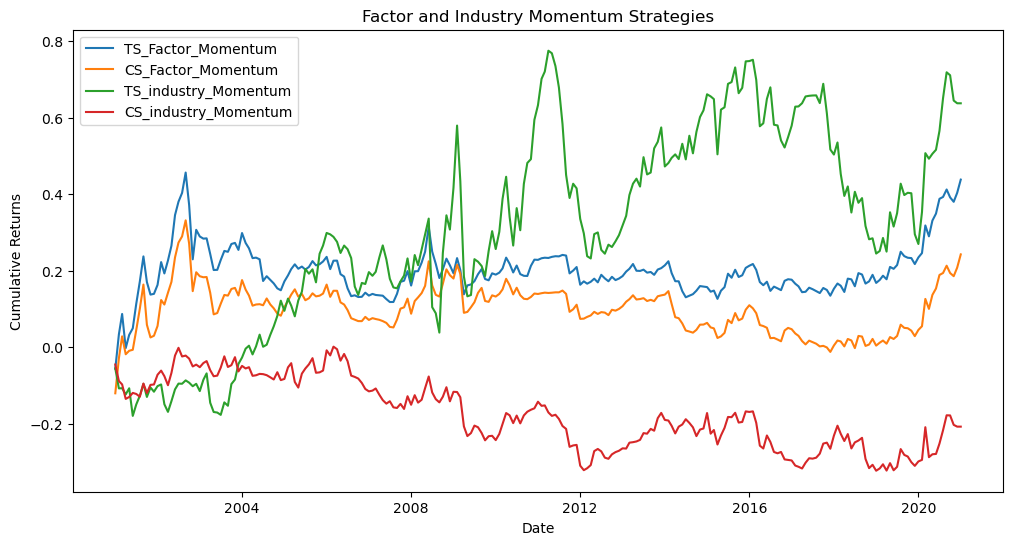

In [589]:


# Combine the two DataFrames and fill unmatched dates
combined_momentum_df = pd.concat([factor_momentum_returns_df, momentum_returns_df], axis=1).ffill().bfill()

# Calculate cumulative returns for each strategy
cumulative_returns_df = (1 + combined_momentum_df).cumprod() - 1

# Plot the cumulative returns
plt.figure(figsize=(12, 6))
for col in cumulative_returns_df.columns:
    plt.plot(cumulative_returns_df.index, cumulative_returns_df[col], label=col)

# Labeling the plot
plt.title('Factor and Industry Momentum Strategies')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()


In [633]:
import pandas as pd
import statsmodels.api as sm

# Initialize lists to store time series of beta values for each regression type
ts_industry_mom_betas = []
cs_industry_mom_betas = []
ts_factor_mom_betas = []
cs_factor_mom_betas = []

# Get dates for the rolling windows (assuming monthly data)
dates = combined_significant_momentum.index

# Loop over each date to calculate betas up to that point in a rolling window
for date in dates:
    ts_industry_betas_for_date = {}
    cs_industry_betas_for_date = {}
    ts_factor_betas_for_date = {}
    cs_factor_betas_for_date = {}
    
    # Loop over each industry column in combined_significant_momentum_df
    for industry in significant_alpha_df.columns:
        data_up_to_date = combined_significant_momentum.loc[:date]

        # --- Time-Series (TS) Industry Momentum Regression ---
        y_ts_industry = data_up_to_date[industry]
        X_ts_industry = sm.add_constant(data_up_to_date[['TS_industry_Momentum']], has_constant='add')
        ts_data_industry = pd.concat([y_ts_industry, X_ts_industry], axis=1).dropna()
        
        if not ts_data_industry.empty:
            y_clean = ts_data_industry[industry]
            X_clean = ts_data_industry[['const', 'TS_industry_Momentum']]
            model_ts_industry = sm.OLS(y_clean, X_clean).fit()
            ts_industry_betas_for_date[industry] = model_ts_industry.params['TS_industry_Momentum']

        # --- Cross-Sectional (CS) Industry Momentum Regression ---
        y_cs_industry = data_up_to_date[industry]
        X_cs_industry = sm.add_constant(data_up_to_date[['CS_industry_Momentum']], has_constant='add')
        cs_data_industry = pd.concat([y_cs_industry, X_cs_industry], axis=1).dropna()
        
        if not cs_data_industry.empty:
            y_clean = cs_data_industry[industry]
            X_clean = cs_data_industry[['const', 'CS_industry_Momentum']]
            model_cs_industry = sm.OLS(y_clean, X_clean).fit()
            cs_industry_betas_for_date[industry] = model_cs_industry.params['CS_industry_Momentum']

        # --- Time-Series (TS) Factor Momentum Regression ---
        y_ts_factor = data_up_to_date[industry]
        X_ts_factor = sm.add_constant(data_up_to_date[['TS_Factor_Momentum']], has_constant='add')
        ts_data_factor = pd.concat([y_ts_factor, X_ts_factor], axis=1).dropna()
        
        if not ts_data_factor.empty:
            y_clean = ts_data_factor[industry]
            X_clean = ts_data_factor[['const', 'TS_Factor_Momentum']]
            model_ts_factor = sm.OLS(y_clean, X_clean).fit()
            ts_factor_betas_for_date[industry] = model_ts_factor.params['TS_Factor_Momentum']

        # --- Cross-Sectional (CS) Factor Momentum Regression ---
        y_cs_factor = data_up_to_date[industry]
        X_cs_factor = sm.add_constant(data_up_to_date[['CS_Factor_Momentum']], has_constant='add')
        cs_data_factor = pd.concat([y_cs_factor, X_cs_factor], axis=1).dropna()
        
        if not cs_data_factor.empty:
            y_clean = cs_data_factor[industry]
            X_clean = cs_data_factor[['const', 'CS_Factor_Momentum']]
            model_cs_factor = sm.OLS(y_clean, X_clean).fit()
            cs_factor_betas_for_date[industry] = model_cs_factor.params['CS_Factor_Momentum']

    # Append results for each date
    ts_industry_mom_betas.append(pd.Series(ts_industry_betas_for_date, name=date))
    cs_industry_mom_betas.append(pd.Series(cs_industry_betas_for_date, name=date))
    ts_factor_mom_betas.append(pd.Series(ts_factor_betas_for_date, name=date))
    cs_factor_mom_betas.append(pd.Series(cs_factor_betas_for_date, name=date))

# Combine lists into DataFrames with dates as the index
ts_industry_mom_beta_df = pd.DataFrame(ts_industry_mom_betas)
cs_industry_mom_beta_df = pd.DataFrame(cs_industry_mom_betas)
ts_factor_mom_beta_df = pd.DataFrame(ts_factor_mom_betas)
cs_factor_mom_beta_df = pd.DataFrame(cs_factor_mom_betas)

# Display the DataFrames
print("TS Industry Momentum Betas:\n", ts_industry_mom_beta_df.head())
print("CS Industry Momentum Betas:\n", cs_industry_mom_beta_df.head())
print("TS Factor Momentum Betas:\n", ts_factor_mom_beta_df.head())
print("CS Factor Momentum Betas:\n", cs_factor_mom_beta_df.head())


TS Industry Momentum Betas:
             Information Technology  Consumer Discretionary  Financials  \
2000-02-01               -0.013612                0.003596    0.005864   
2000-03-01               -0.008822               -0.004333   -0.002593   
2000-04-01               -0.005237               -0.002761   -0.001302   
2000-05-01               -0.003119               -0.001618   -0.001922   
2000-06-01               -0.002753               -0.000634   -0.001066   

            Health Care  Materials  Industrials  
2000-02-01    -0.011121   0.006081     0.003567  
2000-03-01    -0.005110  -0.000480    -0.001157  
2000-04-01    -0.003937  -0.000507    -0.001738  
2000-05-01    -0.003244   0.000019    -0.001245  
2000-06-01    -0.004037   0.000916    -0.000351  
CS Industry Momentum Betas:
             Information Technology  Consumer Discretionary  Financials  \
2000-02-01               -0.011129                0.002940    0.004794   
2000-03-01               -0.007213               

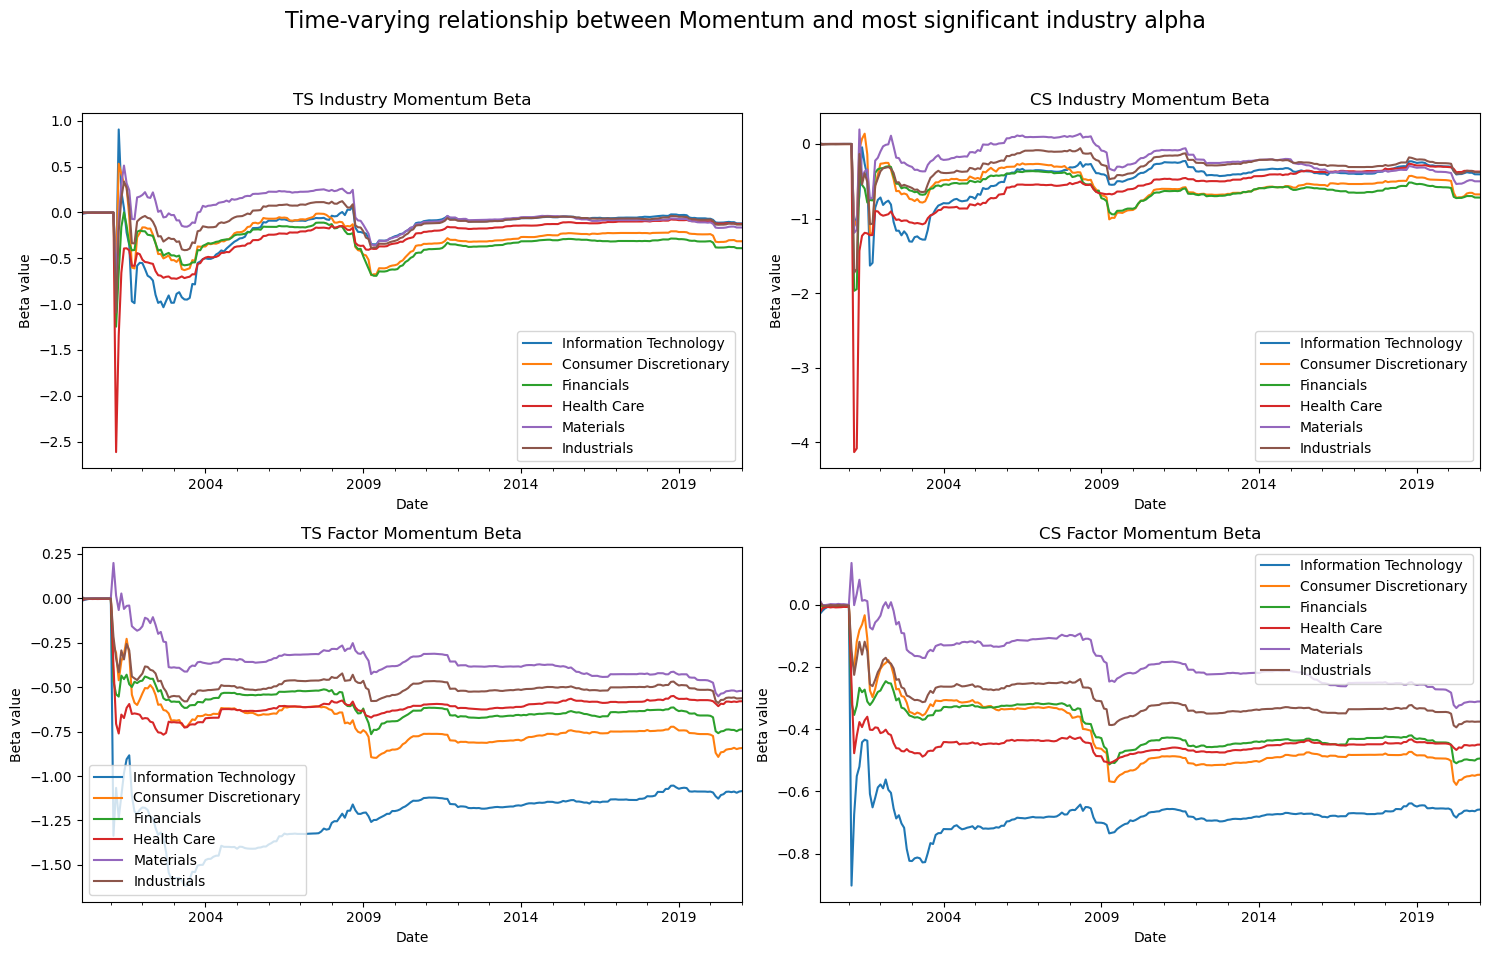

In [689]:
import matplotlib.pyplot as plt

# Define the layout and figure size
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Time-varying relationship between Momentum and most significant industry alpha', fontsize=16)

# Plot each DataFrame on a separate subplot with x as Date and y as Beta value
# TS Industry Momentum Beta
ts_industry_mom_beta_df.plot(ax=axes[0, 0], legend=True)
axes[0, 0].set_title("TS Industry Momentum Beta")
axes[0, 0].set_xlabel("Date")
axes[0, 0].set_ylabel("Beta value")

# CS Industry Momentum Beta
cs_industry_mom_beta_df.plot(ax=axes[0, 1], legend=True)
axes[0, 1].set_title("CS Industry Momentum Beta")
axes[0, 1].set_xlabel("Date")
axes[0, 1].set_ylabel("Beta value")

# TS Factor Momentum Beta
ts_factor_mom_beta_df.plot(ax=axes[1, 0], legend=True)
axes[1, 0].set_title("TS Factor Momentum Beta")
axes[1, 0].set_xlabel("Date")
axes[1, 0].set_ylabel("Beta value")

# CS Factor Momentum Beta
cs_factor_mom_beta_df.plot(ax=axes[1, 1], legend=True)
axes[1, 1].set_title("CS Factor Momentum Beta")
axes[1, 1].set_xlabel("Date")
axes[1, 1].set_ylabel("Beta value")

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [641]:
import pandas as pd

merged_ts_industry = pd.concat([combined_df, ts_industry_mom_beta_df], axis=1).ffill().bfill()


merged_cs_industry = pd.concat([combined_df, cs_industry_mom_beta_df], axis=1).ffill().bfill()


merged_ts_factor = pd.concat([combined_df, ts_factor_mom_beta_df], axis=1).ffill().bfill()


merged_cs_factor = pd.concat([combined_df, cs_factor_mom_beta_df], axis=1).ffill().bfill()


print("Merged DataFrame with TS Industry Momentum Beta:")
print(merged_ts_industry.head())

print("\nMerged DataFrame with CS Industry Momentum Beta:")
print(merged_cs_industry.head())

print("\nMerged DataFrame with TS Factor Momentum Beta:")
print(merged_ts_factor.head())

print("\nMerged DataFrame with CS Factor Momentum Beta:")
print(merged_cs_factor.head())


Merged DataFrame with TS Industry Momentum Beta:
            US_ted_spread  US_term_spread  \
2000-01-01       0.683000        1.106667   
2000-02-01       0.525238        0.754762   
2000-03-01       0.502174        0.392609   
2000-04-01       0.585000        0.160500   
2000-05-01       0.875652        0.426522   

            Equity Market-related Economic Uncertainty Index  US_CPI  \
2000-01-01                                         48.557742   179.3   
2000-02-01                                         45.267241   179.4   
2000-03-01                                         46.421613   180.0   
2000-04-01                                         88.459333   180.3   
2000-05-01                                         55.956774   180.7   

            US_personal_saving_rate  US_PPI  Michigan Consumer Sentiment  \
2000-01-01                      5.0   146.8                        112.0   
2000-02-01                      4.5   147.3                        111.3   
2000-03-01         

In [643]:
import pandas as pd
import statsmodels.api as sm

# Define the dependent and independent variables
industries = ['Information Technology', 'Consumer Discretionary', 'Financials', 
              'Health Care', 'Materials', 'Industrials']
macro_vars = ['US_ted_spread', 'US_term_spread', 'Equity Market-related Economic Uncertainty Index', 
              'US_CPI', 'US_personal_saving_rate', 'US_PPI', 'Michigan Consumer Sentiment']

# Function to perform regressions and store results in a DataFrame
def perform_regressions(merged_df, industry_list, macro_var_list):
    regression_results = []
    
    for industry in industry_list:
        industry_results = {'Industry': industry}
        
        # Define dependent variable (industry) and independent variables (macro variables)
        y = merged_df[industry].dropna()
        
        for macro_var in macro_var_list:
            X = sm.add_constant(merged_df[macro_var].reindex(y.index))  # Align independent variable to y index
            model = sm.OLS(y, X).fit()
            
            # Store beta coefficient and significance for each macro variable
            beta = model.params[macro_var]
            p_value = model.pvalues[macro_var]
            significance = "*" if p_value < 0.1 else ""
            significance = "**" if p_value < 0.05 else significance
            significance = "***" if p_value < 0.01 else significance
            
            # Add beta with significance marker to the industry results
            industry_results[f'Beta of {macro_var}'] = f"{beta:.4f}{significance}"
        
        # Append industry results to the regression results list
        regression_results.append(industry_results)
    
    # Convert results list to DataFrame and return
    results_df = pd.DataFrame(regression_results)
    return results_df

# Perform regressions for each merged DataFrame
ts_industry_mom_results_df = perform_regressions(merged_ts_industry, industries, macro_vars)
cs_industry_mom_results_df = perform_regressions(merged_cs_industry, industries, macro_vars)
ts_factor_mom_results_df = perform_regressions(merged_ts_factor, industries, macro_vars)
cs_factor_mom_results_df = perform_regressions(merged_cs_factor, industries, macro_vars)

# Set 'Industry' as the index for each results DataFrame
ts_industry_mom_results_df.set_index('Industry', inplace=True)
cs_industry_mom_results_df.set_index('Industry', inplace=True)
ts_factor_mom_results_df.set_index('Industry', inplace=True)
cs_factor_mom_results_df.set_index('Industry', inplace=True)

# Display the results for verification
print("TS Industry Momentum Regression Results:")
print(ts_industry_mom_results_df)
print("\nCS Industry Momentum Regression Results:")
print(cs_industry_mom_results_df)
print("\nTS Factor Momentum Regression Results:")
print(ts_factor_mom_results_df)
print("\nCS Factor Momentum Regression Results:")
print(cs_factor_mom_results_df)


TS Industry Momentum Regression Results:
                       Beta of US_ted_spread Beta of US_term_spread  \
Industry                                                              
Information Technology             0.1527***             -0.1084***   
Consumer Discretionary             0.1254***             -0.0951***   
Financials                         0.1114***             -0.0767***   
Health Care                           0.0370             -0.0795***   
Materials                          0.1224***             -0.0354***   
Industrials                        0.0953***             -0.0597***   

                       Beta of Equity Market-related Economic Uncertainty Index  \
Industry                                                                          
Information Technology                                         -0.0015***         
Consumer Discretionary                                         -0.0005***         
Financials                                                

In [692]:
import os
import pandas as pd

# Define the directory where to save the LaTeX file
output_directory = r"C:\Users\lilia\Downloads"
os.makedirs(output_directory, exist_ok=True)

def format_value(value):
   """Format values with significance stars"""
   if isinstance(value, str) and any(x in value for x in ['*']):
       base_value = float(value.rstrip('*'))
       stars = value[len(str(base_value)):]
       return f"${base_value:.4f}${stars}"
   elif isinstance(value, (int, float)):
       return f"${value:.4f}$"
   return value

def clean_macro_name(name):
   """Shorten macro variable names"""
   name_map = {
       'US_ted_spread': 'TED',
       'US_term_spread': 'Term',
       'Equity Market-related Economic Uncertainty Index': 'EMU',
       'US_CPI': 'CPI',
       'US_personal_saving_rate': 'PSR',
       'US_PPI': 'PPI',
       'Michigan Consumer Sentiment': 'MCS'
   }
   return name_map.get(name, name)

# Start LaTeX code
latex_code = [
   "\\begin{landscape}",
   "\\begin{longtable}{l*{7}{c}}",
   "\\caption{Macroeconomic Determinants of Momentum Returns}",
   "\\label{tab:macro_determinants}",
   "\\\\",
   "\\toprule",
   "\\multicolumn{8}{l}{\\textbf{Panel A: Time-Series Industry Momentum}} \\\\",
   "\\midrule",
   "Industry & TED & Term & EMU & CPI & PSR & PPI & MCS \\\\",
   "\\midrule",
   "\\endfirsthead",
   "",
   "\\multicolumn{8}{l}{\\textit{Table \\thetable{} continued from previous page}} \\\\",
   "\\toprule",
   "Industry & TED & Term & EMU & CPI & PSR & PPI & MCS \\\\",
   "\\midrule",
   "\\endhead",
   "",
   "\\midrule",
   "\\multicolumn{8}{r}{\\textit{Continued on next page...}} \\\\",
   "\\endfoot",
   "",
   "\\bottomrule",
   "\\multicolumn{8}{p{6.5in}}{\\textit{Notes:} This table presents the relationships between macroeconomic variables and momentum returns. ",
   "For each industry, we first calculate the correlation (beta) between industry returns and different momentum strategies ",
   "(time-series industry, cross-sectional industry, time-series factor, and cross-sectional factor momentum). ",
   "Then, we regress these betas on macroeconomic variables. Reported coefficients indicate how macro variables explain the ",
   "strength of momentum effects. Macro variables are: TED spread (TED), Term spread (Term), Economic Uncertainty Index (EMU), ",
   "Consumer Price Index (CPI), Personal Savings Rate (PSR), Producer Price Index (PPI), and Michigan Consumer Sentiment (MCS). ",
   "*, **, and *** indicate significance at 10\\%, 5\\%, and 1\\% levels respectively.} \\\\",
   "\\endlastfoot"
]

# Function to add a panel of results
def add_panel(results_df, panel_title):
   panel_rows = [
       "\\midrule",
       f"\\multicolumn{{8}}{{l}}{{\\textbf{{{panel_title}}}}} \\\\"
   ]
   
   for idx, row in results_df.iterrows():
       formatted_row = [
           idx.replace('_', ' '),
           *[format_value(row[f'Beta of {var}']) for var in macro_vars]
       ]
       panel_rows.append(" & ".join(formatted_row) + " \\\\")
   
   return panel_rows

# Add all panels
latex_code.extend(add_panel(ts_industry_mom_results_df, "Panel A: Time-Series Industry Momentum"))
latex_code.extend(add_panel(cs_industry_mom_results_df, "Panel B: Cross-Sectional Industry Momentum"))
latex_code.extend(add_panel(ts_factor_mom_results_df, "Panel C: Time-Series Factor Momentum"))
latex_code.extend(add_panel(cs_factor_mom_results_df, "Panel D: Cross-Sectional Factor Momentum"))

# Close the table
latex_code.extend([
   "\\end{longtable}",
   "\\end{landscape}"
])

# Join all lines and write to file
final_latex = '\n'.join(latex_code)
file_path = os.path.join(output_directory, "momentum_macro_results.tex")

with open(file_path, "w", encoding='utf-8') as f:
   f.write(final_latex)
print(f"Momentum-macro analysis results saved to {file_path}")

Momentum-macro analysis results saved to C:\Users\lilia\Downloads\momentum_macro_results.tex


In [682]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

# Adjust industry returns by subtracting the Risk-Free Rate
industries = industry_avg_returns_df.columns
industry_excess_returns = industry_avg_returns_df[industries].sub(industry_avg_returns_df_merged['Risk-Free Rate'], axis=0)

# Prepare independent variables (S&P 500 and other factors)
independent_vars = industry_avg_returns_df_merged[['S&P 500', 'accruals', 'debt_issuance', 'investment', 
                                                   'low_leverage', 'low_risk', 'momentum', 'profit_growth', 
                                                   'profitability', 'quality', 'seasonality', 'short_term_reversal', 
                                                   'size', 'value']]

# DataFrame to store summary results
regression_summary_results = []
significant_alpha_industries = []

# Dictionary to store beta time series for each industry
beta_time_series_dict = {industry: pd.DataFrame(index=industry_excess_returns.index, columns=independent_vars.columns) for industry in industries}

# Define rolling window size (e.g., 36 months)
window_size = 36  # Adjust based on your data frequency and desired window

# Loop over industries
for industry in industries:
    y_full = industry_excess_returns[industry]
    X_full = independent_vars.copy()
    
    # Initialize lists to collect regression results
    alphas = []
    p_values = []
    adj_r_squared = []
    
    # DataFrame to store betas over time
    beta_df = pd.DataFrame(index=industry_excess_returns.index, columns=independent_vars.columns)
    
    # Loop over time periods using rolling window
    for end in range(window_size, len(y_full)+1):
        start = end - window_size
        y = y_full.iloc[start:end]
        X = X_full.iloc[start:end]
        
        # Drop rows with NaNs
        data = pd.concat([y, X], axis=1).dropna()
        y_clean = data[y.name]
        X_clean = data.drop(columns=[y.name])
        X_clean = sm.add_constant(X_clean)
        
        if len(y_clean) >= window_size // 2:  # Ensure sufficient data points
            # Fit the model
            model = sm.OLS(y_clean, X_clean).fit()
            
            # Store alpha and p-value
            alphas.append((data.index[-1], model.params['const']))
            p_values.append((data.index[-1], model.pvalues['const']))
            adj_r_squared.append((data.index[-1], model.rsquared_adj))
            
            # Store betas
            beta_values = model.params
            beta_df.loc[data.index[-1], beta_values.index] = beta_values
        else:
            # Insufficient data; store NaNs
            alphas.append((data.index[-1], np.nan))
            p_values.append((data.index[-1], np.nan))
            adj_r_squared.append((data.index[-1], np.nan))
            beta_df.loc[data.index[-1]] = np.nan
    
    # Convert alphas and p-values to Series
    alpha_series = pd.Series(dict(alphas))
    p_value_series = pd.Series(dict(p_values))
    adj_r_squared_series = pd.Series(dict(adj_r_squared))
    
    # Check if any alpha is significant over time
    significant_alpha = p_value_series[p_value_series < 0.05]
    if not significant_alpha.empty:
        significant_alpha_industries.append(industry)
    
    # Collect results for the summary table (use average alpha and R-squared)
    avg_alpha = alpha_series.mean()
    avg_adj_r_squared = adj_r_squared_series.mean()
    
    industry_results = {
        'Industry': industry,
        'Average Alpha': f"{avg_alpha:.4f}",
        'Average Adjusted R-squared': f"{avg_adj_r_squared:.4f}"
    }
    
    # Store beta time series in the dictionary
    beta_time_series_dict[industry] = beta_df.dropna()  # Drop NaNs after computation
    
    regression_summary_results.append(industry_results)

# Convert summary results to DataFrame and set 'Industry' as the index
results_summary_df = pd.DataFrame(regression_summary_results).set_index('Industry')

# Filter only the industries with significant alpha for time-series extraction
significant_alpha_df = industry_excess_returns[significant_alpha_industries]

# Display results
print("Regression Summary Results for Each Industry:")
print(results_summary_df)

print("\nTime-Series of Significant Alphas:")
print(significant_alpha_df.head())

# Display beta time series stored in dictionary by industry
for industry, df in beta_time_series_dict.items():
    print(f"\nTime-Series of Betas for {industry}:")
    print(df.head())


Regression Summary Results for Each Industry:
                       Average Alpha Average Adjusted R-squared
Industry                                                       
Information Technology        0.0032                     0.9117
Communication Services       -0.0018                     0.7069
Consumer Discretionary        0.0059                     0.8866
Financials                    0.0045                     0.9030
Health Care                   0.0064                     0.7605
Energy                        0.0010                     0.8307
Consumer Staples              0.0024                     0.6874
Materials                     0.0021                     0.8143
Industrials                   0.0034                     0.8472
Utilities                    -0.0015                     0.5805
Real Estate                   0.0044                     0.5294

Time-Series of Significant Alphas:
            Information Technology  Consumer Discretionary  Financials  \
Date        

In [684]:
beta_time_series_dict

{'Information Technology':              S&P 500  accruals debt_issuance investment low_leverage  \
 Date                                                                   
 2003-01-01  0.990809 -0.212766     -3.494897    1.53394     1.782487   
 2003-02-01  0.925075 -0.267418       -4.6097    1.92397     1.598329   
 2003-03-01  0.852874 -0.027045     -4.218333   1.552642     2.113564   
 2003-04-01   0.83539  0.075593     -4.039121   1.551952     2.103434   
 2003-05-01  0.854937  0.200545     -3.959364   1.447635     2.134712   
 ...              ...       ...           ...        ...          ...   
 2020-09-01  1.098589 -0.907166      0.039703  -0.440168     1.621343   
 2020-10-01  1.085404 -0.966385      0.351597  -0.408324     1.339771   
 2020-11-01  1.131843 -1.743671     -0.867625   1.058106     2.873701   
 2020-12-01  1.100673 -1.753135     -0.852832   1.126431     2.776302   
 2021-01-01  1.090984 -0.757331     -1.430829  -0.067377     3.250432   
 
             low_risk  

In [685]:
# Create a dictionary to store the merged DataFrames
merged_dfs = {}

# Loop through each industry and merge its beta time series with matched combined_df data
for industry, beta_df in beta_time_series_dict.items():
    # Reindex combined_df to match the index of the industry's beta DataFrame
    matched_combined_df = combined_df.reindex(beta_df.index)
    
    # Concatenate the matched combined_df with the beta DataFrame
    merged_df = pd.concat([matched_combined_df, beta_df], axis=1)
    
    # Forward and backward fill for unmatched dates
    merged_df = merged_df.ffill().bfill()
    
    # Store the merged DataFrame in the dictionary
    merged_dfs[industry] = merged_df

# Display the merged DataFrames for verification
for industry, df in merged_dfs.items():
    print(f"\nMerged DataFrame for {industry}:")
    print(df.head())




Merged DataFrame for Information Technology:
            US_ted_spread  US_term_spread  \
Date                                        
2003-01-01       0.180000        2.610870   
2003-02-01       0.169500        2.581500   
2003-03-01       0.155238        2.656190   
2003-04-01       0.154545        2.678636   
2003-05-01       0.198636        2.368182   

            Equity Market-related Economic Uncertainty Index  US_CPI  \
Date                                                                   
2003-01-01                                        190.642581   192.4   
2003-02-01                                        221.338214   192.5   
2003-03-01                                        301.344516   192.5   
2003-04-01                                        155.750000   192.5   
2003-05-01                                        101.164194   192.9   

            US_personal_saving_rate  US_PPI  Michigan Consumer Sentiment  \
Date                                                     

In [686]:
import pandas as pd
import statsmodels.api as sm

# Define macroeconomic variables
macro_vars = ['US_ted_spread', 'US_term_spread',
              'Equity Market-related Economic Uncertainty Index', 'US_CPI',
              'US_personal_saving_rate', 'US_PPI', 'Michigan Consumer Sentiment']

# Function to perform regressions for each variable within a DataFrame
def perform_regressions(df, macro_var_list):
    regression_results = []
    
    # Exclude macro variables from variables to regress
    variables_to_regress = [col for col in df.columns if col not in macro_var_list]
    
    # Check if there are variables to regress
    if not variables_to_regress:
        print("No variables to regress in the DataFrame.")
        return pd.DataFrame()
    
    # Find the macro variables present in the DataFrame
    macro_vars_in_df = [var for var in macro_var_list if var in df.columns]
    
    if not macro_vars_in_df:
        print("No macro variables found in the DataFrame.")
        return pd.DataFrame()
    
    for variable in variables_to_regress:
        variable_results = {'Variable': variable}
        
        y = df[variable].dropna()
        
        for macro_var in macro_vars_in_df:
            # Align y and X to the same index, dropping any NaNs
            X = df[[macro_var]].reindex(y.index)
            combined_data = pd.concat([y, X], axis=1).dropna()
            
            if combined_data.empty or combined_data[macro_var].nunique() <= 1:
                variable_results[f'Beta of {macro_var}'] = "N/A"  # Not enough data
                continue
            
            # Add constant term
            X_clean = sm.add_constant(combined_data[macro_var])
            y_clean = combined_data[variable]
            
            # Ensure there is data to perform regression
            if len(y_clean) > 1:
                try:
                    model = sm.OLS(y_clean, X_clean).fit()
                    beta = model.params[macro_var]
                    p_value = model.pvalues[macro_var]
                    
                    # Determine significance
                    if p_value < 0.01:
                        significance = "***"
                    elif p_value < 0.05:
                        significance = "**"
                    elif p_value < 0.1:
                        significance = "*"
                    else:
                        significance = ""
                    
                    # Add beta with significance marker to the variable results
                    variable_results[f'Beta of {macro_var}'] = f"{beta:.4f}{significance}"
                except Exception as e:
                    variable_results[f'Beta of {macro_var}'] = "Error"
                    print(f"Regression error for {variable} on {macro_var}: {e}")
            else:
                variable_results[f'Beta of {macro_var}'] = "N/A"  # Insufficient data
        
        regression_results.append(variable_results)
    
    # Convert results list to DataFrame and return
    results_df = pd.DataFrame(regression_results).set_index('Variable')
    return results_df

# Dictionary to store regression results for each DataFrame in merged_dfs
regression_results_dict = {}

# Loop through each DataFrame in merged_dfs and perform regressions
for key, df in merged_dfs.items():
    # Ensure df is a DataFrame
    if isinstance(df, pd.DataFrame):
        # Perform regressions
        results_df = perform_regressions(df, macro_vars)
        if not results_df.empty:
            regression_results_dict[key] = results_df
        else:
            print(f"No results for {key} because no variables or macro variables were found.")
    else:
        print(f"Skipping {key} because it is not a DataFrame.")

# Display the results for each DataFrame in regression_results_dict
for key, results_df in regression_results_dict.items():
    print(f"\nRegression Results for {key}:")
    print(results_df)



Regression Results for Information Technology:
                    Beta of US_ted_spread Beta of US_term_spread  \
Variable                                                           
S&P 500                           -0.0173             -0.0605***   
accruals                        0.5305***                 0.0311   
debt_issuance                     -0.0026                -0.0901   
investment                     -0.5012***                 0.0338   
low_leverage                   -0.5862***                -0.0576   
low_risk                           0.1300                -0.0224   
momentum                       -0.1928***             -0.0561***   
profit_growth                     0.2140*             -0.1389***   
profitability                   -0.3783**             -0.3688***   
quality                         0.4731***              0.2278***   
seasonality                    -0.6455***                 0.0593   
short_term_reversal              0.1452**                -0.0094   


In [693]:
import os
import pandas as pd

# Define the directory where to save the LaTeX file
output_directory = r"C:\Users\lilia\Downloads"
os.makedirs(output_directory, exist_ok=True)

def format_value(value):
   """Format values with significance stars"""
   if isinstance(value, str):
       if value in ['N/A', 'Error']:
           return value
       if any(x in value for x in ['*']):
           base_value = float(value.rstrip('*'))
           stars = value[len(str(base_value)):]
           return f"${base_value:.4f}${stars}"
   elif isinstance(value, (int, float)):
       return f"${value:.4f}$"
   return value

def clean_macro_name(name):
   """Shorten macro variable names"""
   name_map = {
       'Beta of US_ted_spread': 'TED',
       'Beta of US_term_spread': 'Term',
       'Beta of Equity Market-related Economic Uncertainty Index': 'EMU',
       'Beta of US_CPI': 'CPI',
       'Beta of US_personal_saving_rate': 'PSR',
       'Beta of US_PPI': 'PPI',
       'Beta of Michigan Consumer Sentiment': 'MCS'
   }
   return name_map.get(name, name)

# Split columns into two parts for better readability
def split_columns(df):
   n_cols = len(df.columns)
   mid_point = n_cols // 2
   return df.iloc[:, :mid_point], df.iloc[:, mid_point:]

# Start LaTeX code
latex_code = [
   "\\begin{landscape}",
   "\\begin{longtable}{l*{4}{c}}",  # Adjust number of columns based on first half
   "\\caption{Macroeconomic Determinants of Industry and Factor Returns}",
   "\\label{tab:macro_determinants}",
   "\\\\",
   "\\toprule"
]

# Function to add header rows
def add_headers(columns):
   return ["Variables & " + " & ".join([clean_macro_name(col) for col in columns]) + " \\\\"]

# Function to add results for one part
def add_results_section(df_part, industry, first_part=True):
   rows = []
   if first_part:
       rows.append(f"\\multicolumn{{{len(df_part.columns) + 1}}}{{l}}{{\\textbf{{{industry}}}}} \\\\")
   
   for idx, row in df_part.iterrows():
       formatted_row = [
           idx.replace('_', ' '),
           *[format_value(val) for val in row]
       ]
       rows.append(" & ".join(formatted_row) + " \\\\")
   
   return rows

# Add first part of table
latex_code.extend([
   "\\multicolumn{5}{l}{\\textbf{Panel A: First Set of Macro Variables}} \\\\",
   "\\midrule",
   "\\endfirsthead",
   "",
   "\\multicolumn{5}{l}{\\textit{Table \\thetable{} continued from previous page}} \\\\",
   "\\toprule",
   "\\endhead",
   "",
   "\\midrule",
   "\\multicolumn{5}{r}{\\textit{Continued on next page...}} \\\\",
   "\\endfoot",
   "",
   "\\bottomrule",
   "\\multicolumn{5}{p{6.5in}}{\\textit{Notes:} This table presents regressions of industry and factor returns on macroeconomic variables. ",
   "Each coefficient represents the sensitivity of returns to macro variables: TED spread (TED), Term spread (Term), ",
   "Economic Uncertainty Index (EMU), Consumer Price Index (CPI), Personal Savings Rate (PSR), Producer Price Index (PPI), ",
   "and Michigan Consumer Sentiment (MCS). *, **, and *** indicate significance at 10\\%, 5\\%, and 1\\% levels respectively.} \\\\",
   "\\endlastfoot"
])

# Process each DataFrame in the dictionary
for industry, df in regression_results_dict.items():
   # Split columns into two parts
   df_part1, df_part2 = split_columns(df)
   
   # Add headers for first part
   latex_code.extend(add_headers(df_part1.columns))
   latex_code.extend(add_results_section(df_part1, industry))
   latex_code.append("\\midrule")

# Close first part and start second part
latex_code.extend([
   "\\end{longtable}",
   "",
   "\\begin{longtable}{l*{4}{c}}",  # Adjust for second half of columns
   "\\caption*{Macroeconomic Determinants (continued)}",
   "\\\\",
   "\\toprule",
   "\\multicolumn{5}{l}{\\textbf{Panel B: Second Set of Macro Variables}} \\\\"
])

# Add second part of results
for industry, df in regression_results_dict.items():
   df_part1, df_part2 = split_columns(df)
   latex_code.extend(add_headers(df_part2.columns))
   latex_code.extend(add_results_section(df_part2, industry))
   latex_code.append("\\midrule")

# Close the table
latex_code.extend([
   "\\end{longtable}",
   "\\end{landscape}"
])

# Join all lines and write to file
final_latex = '\n'.join(latex_code)
file_path = os.path.join(output_directory, "macro_regression_results.tex")

with open(file_path, "w", encoding='utf-8') as f:
   f.write(final_latex)
print(f"Macro regression results saved to {file_path}")

Macro regression results saved to C:\Users\lilia\Downloads\macro_regression_results.tex


In [699]:
import pandas as pd
import re

# New dictionary to store top 3 significant betas for each industry
top3_significant_betas = {}

for industry, df in regression_results_dict.items():
    # Create a copy to avoid modifying the original DataFrame
    df_copy = df.copy()
    
    # Initialize a list to store tuples of (variable, beta_value, significance)
    beta_list = []
    
    for index, row in df_copy.iterrows():
        # Iterate over beta columns
        for col in df_copy.columns:
            beta_str = row[col]
            if pd.isnull(beta_str) or beta_str == 'N/A':
                continue
            
            # Extract beta value and significance markers
            match = re.match(r"(-?\d+\.\d+)(\*{1,3})?$", beta_str)
            if match:
                beta_value = float(match.group(1))
                significance = match.group(2)
                if significance:
                    # Beta is significant
                    beta_list.append({
                        'Variable': index,
                        'Macro Variable': col.replace('Beta of ', ''),
                        'Beta Value': beta_value,
                        'Significance': significance
                    })
            else:
                continue
    
    if not beta_list:
        # No significant betas found for this industry
        continue
    
    # Convert list to DataFrame
    beta_df = pd.DataFrame(beta_list)
    
    # Sort by absolute beta value in descending order
    beta_df['Absolute Beta'] = beta_df['Beta Value'].abs()
    beta_df.sort_values(by='Absolute Beta', ascending=False, inplace=True)
    
    # Select top 3 significant betas
    top3_betas_df = beta_df.head(3)
    
    # Drop 'Absolute Beta' column as it's no longer needed
    top3_betas_df.drop(columns=['Absolute Beta'], inplace=True)
    
    # Set 'Variable' as index
    top3_betas_df.set_index('Variable', inplace=True)
    
    # Store in the new dictionary
    top3_significant_betas[industry] = top3_betas_df

# Display the top 3 significant betas for each industry
for industry, df in top3_significant_betas.items():
    print(f"\nTop 3 Significant Betas for {industry}:")
    print(df)



Top 3 Significant Betas for Information Technology:
             Macro Variable  Beta Value Significance
Variable                                            
seasonality   US_ted_spread     -0.6455          ***
low_leverage  US_ted_spread     -0.5862          ***
accruals      US_ted_spread      0.5305          ***

Top 3 Significant Betas for Communication Services:
              Macro Variable  Beta Value Significance
Variable                                             
seasonality    US_ted_spread      1.3615          ***
value          US_ted_spread     -1.3074          ***
profit_growth  US_ted_spread     -1.2846          ***

Top 3 Significant Betas for Consumer Discretionary:
            Macro Variable  Beta Value Significance
Variable                                           
seasonality  US_ted_spread     -2.0778          ***
investment   US_ted_spread      1.1690          ***
accruals     US_ted_spread      1.1523          ***

Top 3 Significant Betas for Financials:
     

C:\Users\lilia\AppData\Local\Temp\ipykernel_2424\1102462332.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top3_betas_df.drop(columns=['Absolute Beta'], inplace=True)
C:\Users\lilia\AppData\Local\Temp\ipykernel_2424\1102462332.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top3_betas_df.drop(columns=['Absolute Beta'], inplace=True)
C:\Users\lilia\AppData\Local\Temp\ipykernel_2424\1102462332.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

In [697]:
top3_significant_betas['Communication Services']

,Macro Variable,Beta Value,Significance
Variable,,,
seasonality,US_ted_spread,1.3615,***
value,US_ted_spread,-1.3074,***
profit_growth,US_ted_spread,-1.2846,***


In [698]:
import os
import pandas as pd

# Define the directory where to save the LaTeX file
output_directory = r"C:\Users\lilia\Downloads"
os.makedirs(output_directory, exist_ok=True)

def format_value(value, significance=''):
   """Format values with significance stars"""
   if pd.isna(value):
       return '--'
   if isinstance(value, (int, float)):
       return f"${value:.4f}${significance}"
   return value

def clean_macro_name(name):
   """Shorten macro variable names"""
   name_map = {
       'US_ted_spread': 'TED',
       'US_term_spread': 'Term',
       'Equity Market-related Economic Uncertainty Index': 'EMU',
       'US_CPI': 'CPI',
       'US_personal_saving_rate': 'PSR',
       'US_PPI': 'PPI',
       'Michigan Consumer Sentiment': 'MCS'
   }
   return name_map.get(name, name)

# Start LaTeX code
latex_code = [
   "\\begin{table}[htbp]",
   "\\small",
   "\\centering",
   "\\begin{threeparttable}",
   "\\caption{Top 3 Significant Macroeconomic Effects by Industry}",
   "\\label{tab:top_significant_betas}",
   "\\begin{tabular}{lccc}",
   "\\toprule",
   "Industry/Variable & Macro Factor & Coefficient & Significance \\\\",
   "\\midrule"
]

# Function to add results for one industry
def add_industry_results(industry, df):
   rows = []
   # Add industry header
   rows.append(f"\\multicolumn{{4}}{{l}}{{\\textbf{{{industry}}}}} \\\\")
   
   # Add top 3 results
   for var_name, row in df.iterrows():
       macro_name = clean_macro_name(row['Macro Variable'])
       beta_val = format_value(row['Beta Value'])
       formatted_row = [
           var_name.replace('_', ' '),
           macro_name,
           beta_val,
           row['Significance']
       ]
       rows.append(" & ".join(formatted_row) + " \\\\")
   
   return rows

# Process each industry's results
for industry, df in top3_significant_betas.items():
   latex_code.extend(add_industry_results(industry, df))
   latex_code.append("\\midrule")  # Add line between industries

# Remove last \midrule
latex_code.pop()

# Add table footer and notes
latex_code.extend([
   "\\bottomrule",
   "\\end{tabular}",
   "\\begin{tablenotes}",
   "\\small",
   "\\item \\textit{Notes:} This table presents the three most significant macroeconomic relationships ",
   "for each industry or factor portfolio. Coefficients are sorted by absolute magnitude within each category. ",
   "Macro variables are abbreviated as: TED (TED spread), Term (Term spread), EMU (Economic Uncertainty Index), ",
   "CPI (Consumer Price Index), PSR (Personal Savings Rate), PPI (Producer Price Index), ",
   "and MCS (Michigan Consumer Sentiment). Significance levels are indicated by: ",
   "* (10\\%), ** (5\\%), and *** (1\\%). ",
   "\\end{tablenotes}",
   "\\end{threeparttable}",
   "\\end{table}"
])

# Join all lines and write to file
final_latex = '\n'.join(latex_code)
file_path = os.path.join(output_directory, "top_significant_betas.tex")

with open(file_path, "w", encoding='utf-8') as f:
   f.write(final_latex)
print(f"Top significant betas table saved to {file_path}")

Top significant betas table saved to C:\Users\lilia\Downloads\top_significant_betas.tex
